# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

### Кластеризация параметров

#### 1. Загрузка и подготовка датасета

In [116]:
# Загрузка разных библиотек
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.metrics import silhouette_score
from fcmeans import FCM
import scipy.stats as stats
import statistics
from scipy.stats import f_oneway

%matplotlib inline 

In [117]:
# Загрузка в объект DataFrame файла X_bp.xlsx, метод read_excel
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  
0.0                    220.0  
1.0                    220.0  
2.0                    220.0  
3.0                    220.0  
4.0                    220.0

In [118]:
# Загрузка в объект DataFrame файла X_nup.xlsx, метод read_excel
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0

In [119]:

# соединение объектов DataFrame, метод merge, объединение по индексу, тип объединения INNER
df = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [120]:
# Изменение типа данных индекса, метод astype('int')
df.index = df.index.astype('int')
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0  
1                    220.0                 0.0          4.0               60.0  
2                    220.0                 0.0          4.0               70.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0

In [121]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('float64')

In [122]:
# Изменение типа данных и ранжировка переменной 'Угол нашивки, град', метод astype('int')
df = df.replace({'Угол нашивки, град': {0.0 : 0, 90.0 : 1}})
df['Угол нашивки, град'] = df['Угол нашивки, град'].astype(int)

In [123]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df.dtypes['Угол нашивки, град']

dtype('int32')

In [124]:
# Описательная статистика датасета df, метод describe()
df.describe(include='all')

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean             0.491691     6.899222          57.153929  
std              0.500175     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%              1.000000     8.586293          64.944961  
max              1.000000    14.440522         103.988901

In [125]:
# Вывод сведений о новом объекте DataFrame df_s, метод info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int32  
 11  Шаг нашивки      

In [126]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [127]:
# Заменить названия столбцов таблицы методом set_axis()
df = df.set_axis(['МатрНап','Плотн','МодУпр','КолвОтвер','КолвЭпокс','ТемпВсп','ПовПлотн','МодУпрРаст','ПрочнРаст','КолвСмол','УголНаш','ШагНаш','ПлотнНаш'], axis = 'columns') 
df.head()

МатрНап   Плотн      МодУпр  КолвОтвер  КолвЭпокс     ТемпВсп  ПовПлотн  \
0  1.857143  2030.0  738.736842      30.00  22.267857  100.000000     210.0   
1  1.857143  2030.0  738.736842      50.00  23.750000  284.615385     210.0   
2  1.857143  2030.0  738.736842      49.90  33.000000  284.615385     210.0   
3  1.857143  2030.0  738.736842     129.00  21.250000  300.000000     210.0   
4  2.771331  2030.0  753.000000     111.86  22.267857  284.615385     210.0   

   МодУпрРаст  ПрочнРаст  КолвСмол  УголНаш  ШагНаш  ПлотнНаш  
0        70.0     3000.0     220.0        0     4.0      57.0  
1        70.0     3000.0     220.0        0     4.0      60.0  
2        70.0     3000.0     220.0        0     4.0      70.0  
3        70.0     3000.0     220.0        0     5.0      47.0  
4        70.0     3000.0     220.0        0     5.0      57.0

In [128]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш'],
      dtype='object')

In [129]:
# копия датасета
df_s = df.copy()

In [130]:
# относительное удлинение при растяжении
df['ДелРаст'] = df['ПрочнРаст'] / df['МодУпрРаст']

In [131]:
# относительное удлиненее
df['Дел'] = df['ПрочнРаст'] / df['МодУпр']

#### 2. Нормализация датасета

In [132]:
# Загрузка MinMaxScaler из библиотеки sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [133]:
# Применение MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [134]:
# Описательная статистика нормализованного датасета df
df.describe()

МатрНап        Плотн       МодУпр    КолвОтвер    КолвЭпокс  \
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000   
mean      0.488427     0.512533     0.386301     0.512273     0.426215   
std       0.175541     0.154890     0.172978     0.156147     0.128370   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.370696     0.404175     0.260652     0.412240     0.338919   
50%       0.483912     0.516497     0.386165     0.512240     0.425487   
75%       0.608045     0.608413     0.502528     0.618003     0.517842   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           ТемпВсп     ПовПлотн   МодУпрРаст    ПрочнРаст     КолвСмол  \
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000   
mean      0.593354     0.344638     0.497880     0.508634     0.484838   
std       0.130695     0.201092     0.167435     0.172724     0.156875   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.507756     0.190296     0.386030     0.390881     0.382955   
50%       0.593401     0.322574     0.494672     0.506003     0.486875   
75%       0.679924     0.495105     0.606751     0.615432     0.587411   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           УголНаш       ШагНаш     ПлотнНаш      ДелРаст          Дел  
count  1023.000000  1023.000000  1023.000000  1023.000000  1023.000000  
mean      0.491691     0.477768     0.549616     0.487678     0.006007  
std       0.500175     0.177519     0.118772     0.160786     0.037767  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.351790     0.478890     0.378153     0.001472  
50%       0.000000     0.478940     0.551423     0.485273     0.002328  
75%       1.000000     0.594597     0.624537     0.589120     0.003666  
max       1.000000     1.000000     1.000000     1.000000     1.000000

### Прочность при растяжении, МПа

###### 13. Исключить из параметров 'МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп', 'ПовПлотн', 'МодУпрРаст', 'КолвСмол', 'УголНаш', 'ШагНаш', 'ПлотнНаш', 'Дел'

In [135]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш', 'ДелРаст', 'Дел'],
      dtype='object')

In [136]:
# Назначение переменной X
X = df.drop(['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп', 'ПовПлотн', 'МодУпрРаст', 'КолвСмол', 'УголНаш', 'ШагНаш', 'ПлотнНаш', 'Дел'], axis=1)

###### K-Means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


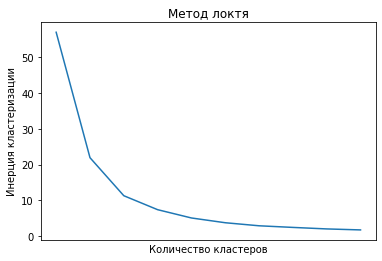

In [137]:
# Метод локтя
n_inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    n_inertia.append(km.inertia_)
    
fig, ax = plt.subplots()
sns.lineplot(x=np.arange(1, 11), y=n_inertia, ax=ax)
ax.set_title('Метод локтя')
ax.set_xlabel('Количество кластеров')
ax.set_ylabel('Инерция кластеризации')
plt.xticks(np.arange(1, 1))
plt.show()
# ax.set_title('Метод локтя')
# ax.set_xlabel('Количество кластеров')
# ax.set_ylabel('Качество кластеризации')

In [138]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df.columns

Index(['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш', 'ДелРаст', 'Дел'],
      dtype='object')

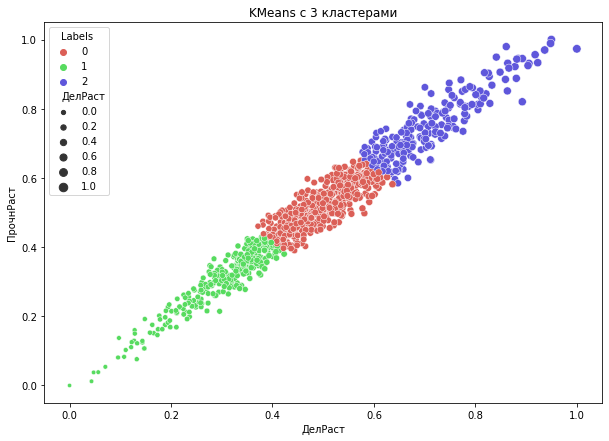

In [139]:
# KMeans показывает кластеризацию параметров
fig = plt.figure(figsize=(10,7))
km5 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km5.labels_

sns.scatterplot(x=X['ДелРаст'], y=X['ПрочнРаст'], hue=X['Labels'], size=X['ДелРаст'], palette=sns.color_palette('hls', 3))

plt.title('KMeans c 3 кластерами')
plt.show()

In [140]:
# количество данных в кластерах
X[X['Labels']==0].count(),X[X['Labels']==1].count(),X[X['Labels']==2].count(),X[X['Labels']==3].count(),X[X['Labels']==4].count()

(ПрочнРаст    484
 ДелРаст      484
 Labels       484
 dtype: int64,
 ПрочнРаст    300
 ДелРаст      300
 Labels       300
 dtype: int64,
 ПрочнРаст    239
 ДелРаст      239
 Labels       239
 dtype: int64,
 ПрочнРаст    0
 ДелРаст      0
 Labels       0
 dtype: int64,
 ПрочнРаст    0
 ДелРаст      0
 Labels       0
 dtype: int64)

In [141]:
# данные в кластерах по параметру 'ПрочнРаст'
X[X['Labels']==0]['ПрочнРаст'].head(20),X[X['Labels']==1]['ПрочнРаст'].head(20),X[X['Labels']==2]['ПрочнРаст'].head(20),X[X['Labels']==3]['ПрочнРаст'].head(20),X[X['Labels']==4]['ПрочнРаст'].head(20)

(12    0.504591
 13    0.504591
 14    0.504591
 21    0.504591
 22    0.504591
 23    0.551464
 25    0.564512
 26    0.510862
 28    0.445341
 29    0.593114
 30    0.502239
 32    0.507099
 33    0.450606
 38    0.605842
 39    0.541612
 42    0.421020
 43    0.461906
 44    0.436028
 47    0.529936
 48    0.506003
 Name: ПрочнРаст, dtype: float64,
 7     0.271429
 8     0.271429
 9     0.342563
 10    0.342563
 11    0.342563
 17    0.271429
 18    0.271429
 19    0.342563
 20    0.342563
 36    0.303619
 37    0.124386
 45    0.214490
 49    0.269906
 50    0.348433
 51    0.377301
 59    0.343290
 60    0.394141
 65    0.209087
 66    0.428445
 70    0.106904
 Name: ПрочнРаст, dtype: float64,
 0     0.698235
 1     0.698235
 2     0.698235
 3     0.698235
 4     0.698235
 5     0.698235
 6     0.698235
 15    0.698235
 16    0.698235
 24    0.949223
 27    0.719231
 31    0.625957
 34    0.729017
 35    0.765150
 40    0.644347
 41    0.651495
 46    0.843247
 57    0.753826
 62 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


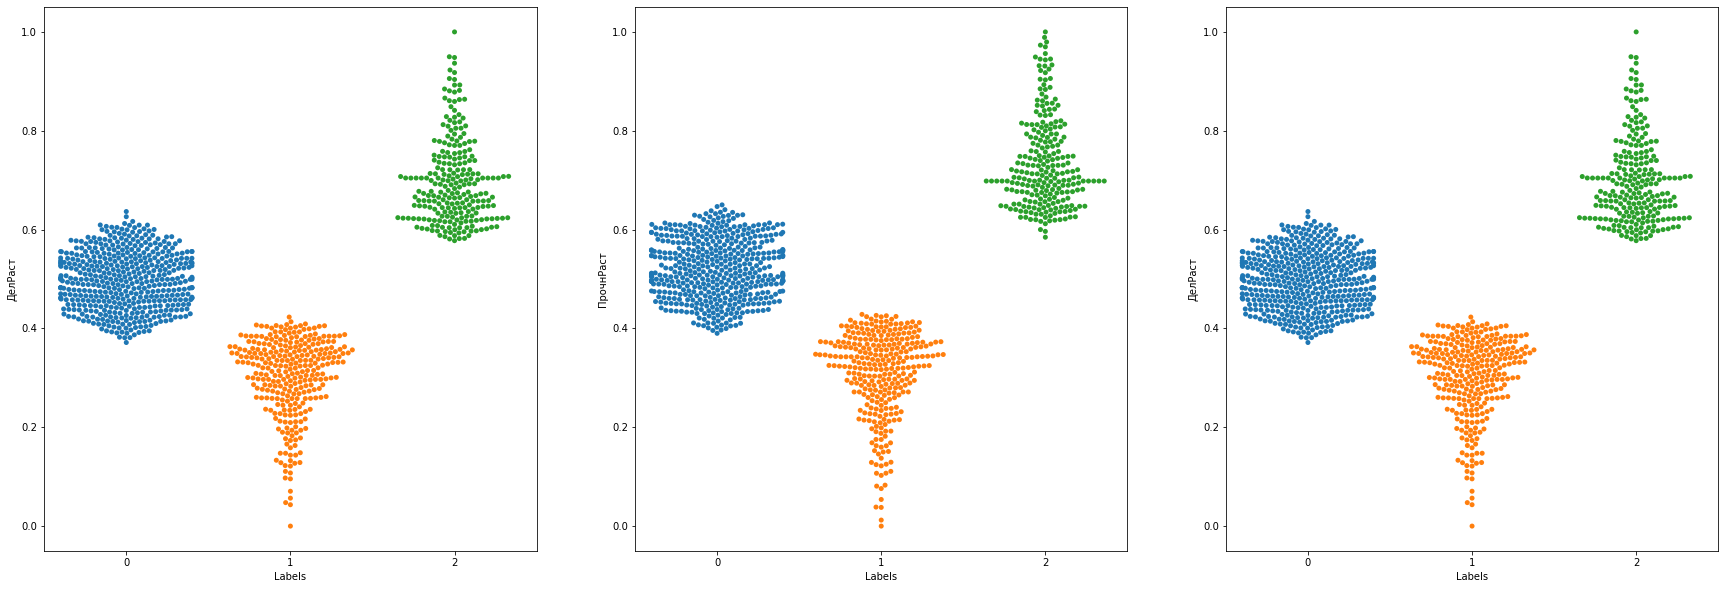

In [142]:
# swarmplot показывает распределение и разброс параметров по кластерам
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(131)
sns.swarmplot(x='Labels', y='ДелРаст', data=X, ax=ax)

ax = fig.add_subplot(132)
sns.swarmplot(x='Labels', y='ПрочнРаст', data=X, ax=ax)

ax = fig.add_subplot(133)
sns.swarmplot(x='Labels', y='ДелРаст', data=X, ax=ax)

plt.show()

In [143]:
# The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.5107344786418432


###### Иерархическая кластеризация (агломеративная)

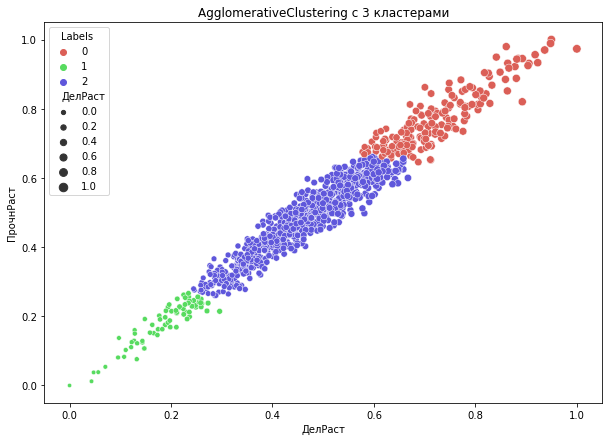

In [339]:
# AgglomerativeClustering показывает агломеративную кластеризацию
agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X.drop(['Labels'], axis=1)) # ward, complete...

X['Labels'] = agglom.labels_
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X['ДелРаст'], y=X['ПрочнРаст'], hue=X['Labels'], size=X['ДелРаст'],
                palette=sns.color_palette('hls', 3))
plt.title('AgglomerativeClustering c 3 кластерами')
plt.show()

In [145]:
# количество данных в кластерах
X[X['Labels']==0].count(),X[X['Labels']==1].count(),X[X['Labels']==2].count(),X[X['Labels']==3].count(),X[X['Labels']==4].count()

(ПрочнРаст    188
 ДелРаст      188
 Labels       188
 dtype: int64,
 ПрочнРаст    71
 ДелРаст      71
 Labels       71
 dtype: int64,
 ПрочнРаст    764
 ДелРаст      764
 Labels       764
 dtype: int64,
 ПрочнРаст    0
 ДелРаст      0
 Labels       0
 dtype: int64,
 ПрочнРаст    0
 ДелРаст      0
 Labels       0
 dtype: int64)

In [146]:
# данные в кластерах по параметру 'ПрочнРаст'
X[X['Labels']==0]['ПрочнРаст'].head(20),X[X['Labels']==1]['ПрочнРаст'].head(20),X[X['Labels']==2]['ПрочнРаст'].head(20),X[X['Labels']==3]['ПрочнРаст'].head(20),X[X['Labels']==4]['ПрочнРаст'].head(20)

(0     0.698235
 1     0.698235
 2     0.698235
 3     0.698235
 4     0.698235
 5     0.698235
 6     0.698235
 15    0.698235
 16    0.698235
 24    0.949223
 27    0.719231
 34    0.729017
 35    0.765150
 41    0.651495
 46    0.843247
 57    0.753826
 64    0.699905
 67    0.683267
 68    0.832440
 73    0.745932
 Name: ПрочнРаст, dtype: float64,
 37     0.124386
 45     0.214490
 65     0.209087
 70     0.106904
 77     0.129287
 84     0.201768
 94     0.151016
 113    0.175257
 119    0.238088
 154    0.159781
 155    0.226385
 156    0.231462
 175    0.181807
 180    0.229093
 206    0.145862
 224    0.262028
 227    0.107019
 230    0.102592
 256    0.240426
 259    0.125194
 Name: ПрочнРаст, dtype: float64,
 7     0.271429
 8     0.271429
 9     0.342563
 10    0.342563
 11    0.342563
 12    0.504591
 13    0.504591
 14    0.504591
 17    0.271429
 18    0.271429
 19    0.342563
 20    0.342563
 21    0.504591
 22    0.504591
 23    0.551464
 25    0.564512
 26    0.510862


In [147]:
# The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.41198385885966476


In [148]:
# The matrix nearest-cluster distance
dist = distance_matrix(X.drop(['Labels'], axis=1), X.drop(['Labels'], axis=1))
print(dist)

[[0.         0.         0.         ... 0.20884566 0.48267472 0.11639773]
 [0.         0.         0.         ... 0.20884566 0.48267472 0.11639773]
 [0.         0.         0.         ... 0.20884566 0.48267472 0.11639773]
 ...
 [0.20884566 0.20884566 0.20884566 ... 0.         0.27749881 0.09562685]
 [0.48267472 0.48267472 0.48267472 ... 0.27749881 0.         0.37301064]
 [0.11639773 0.11639773 0.11639773 ... 0.09562685 0.37301064 0.        ]]


In [149]:
hierarchy_clustering = hierarchy.linkage(dist, 'complete')

C:\Users\Admin\AppData\Local\Temp\ipykernel_12032\1577177698.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hierarchy_clustering = hierarchy.linkage(dist, 'complete')


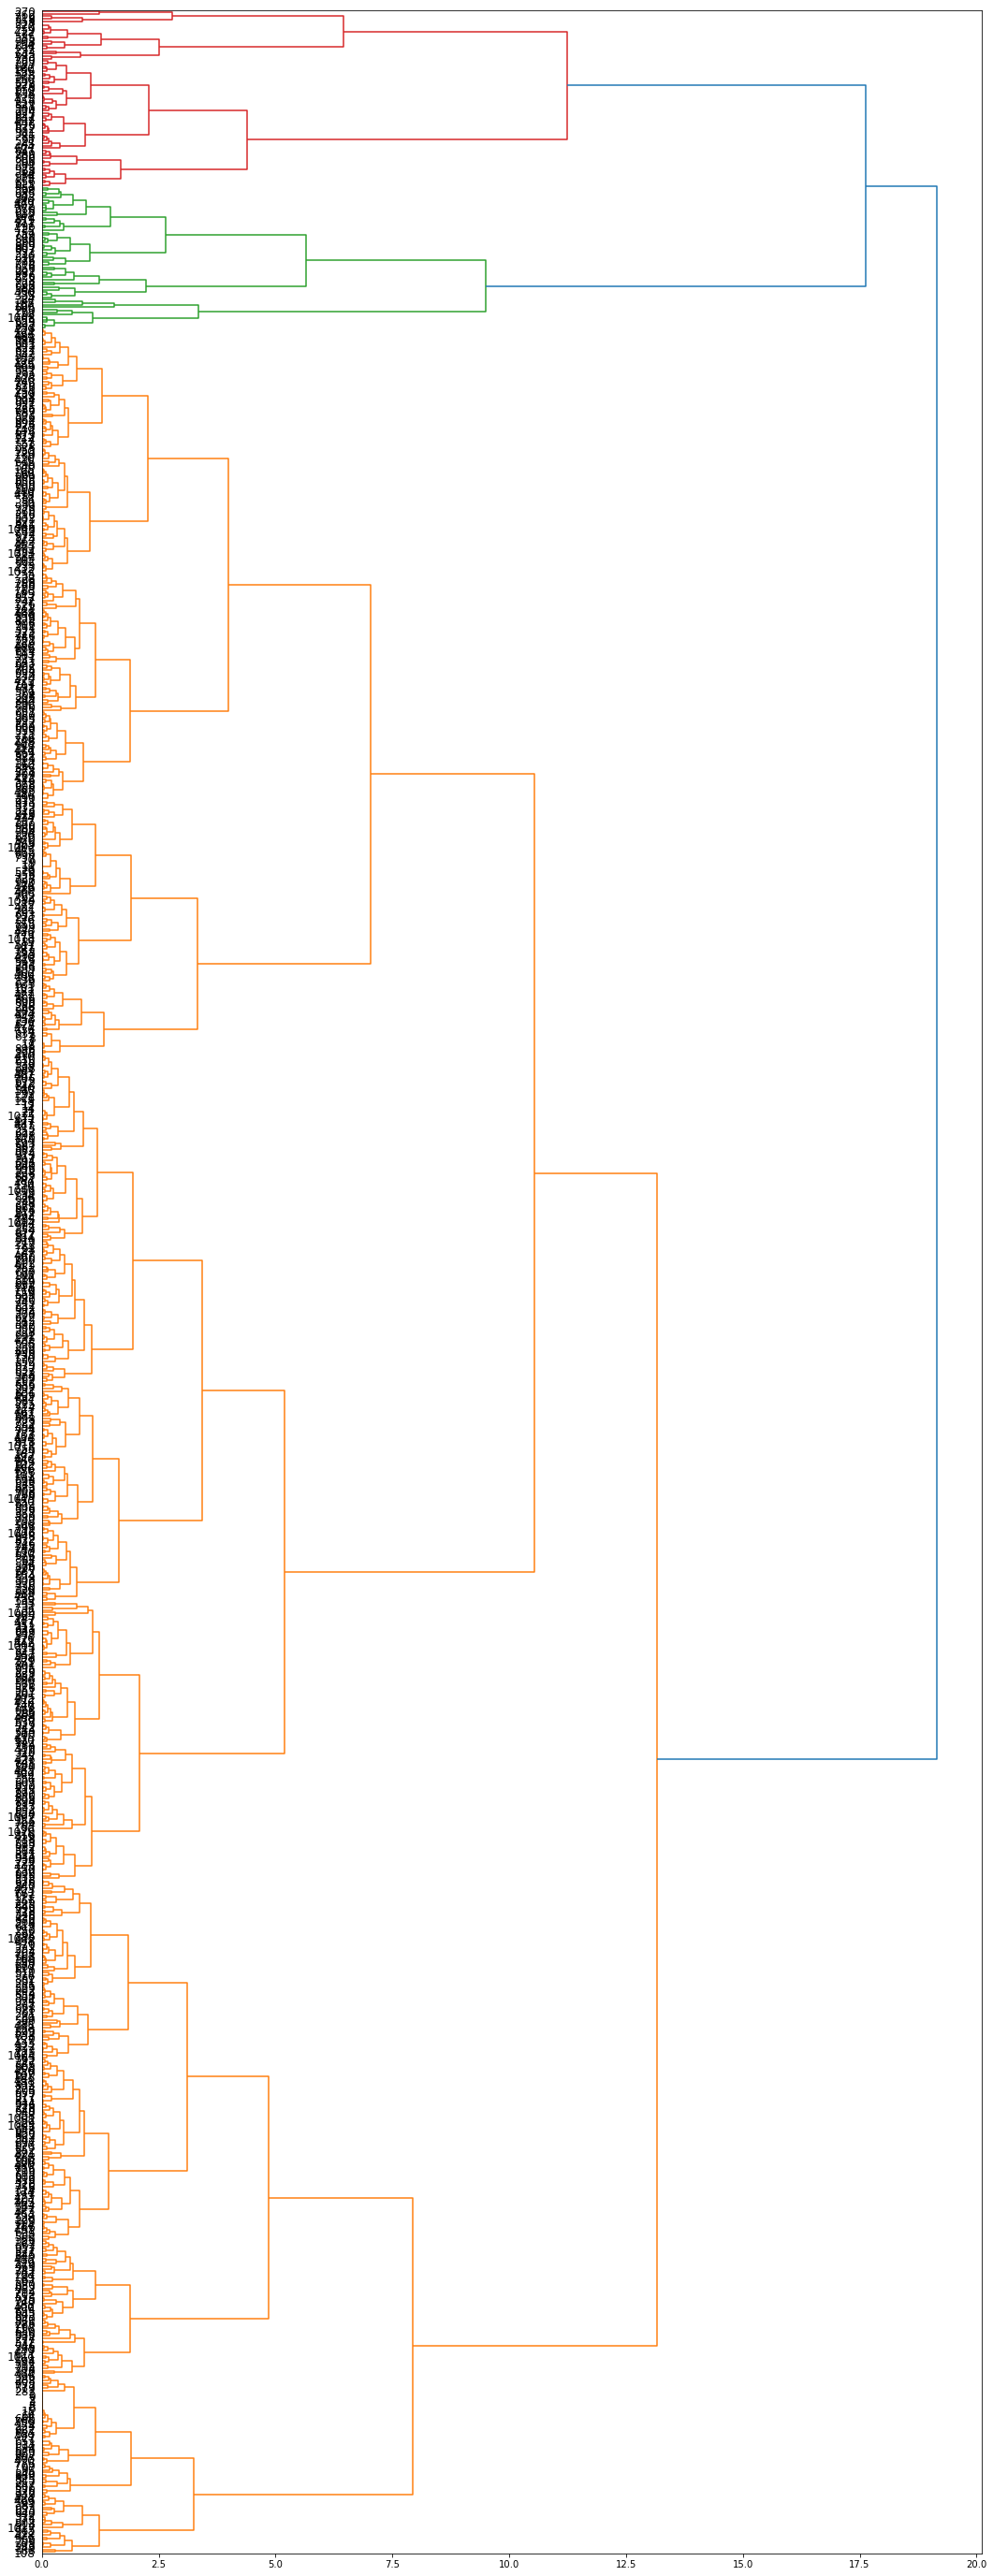

In [150]:
# dendrogram
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(hierarchy_clustering, leaf_font_size=12, orientation='right')

Проверка значимости различия групп по критерию Краскала-Уоллиса

In [151]:
# индексация кластеров
filter_0 = X[X['Labels']==0].index
filter_1 = X[X['Labels']==1].index
filter_2 = X[X['Labels']==2].index
#filter_3 = X[X['Labels']==3].index

In [152]:
# выделение объектов np.array
df_0 = np.array(df_s['ПрочнРаст'][filter_0].reset_index(drop=True))
df_1 = np.array(df_s['ПрочнРаст'][filter_1].reset_index(drop=True))
df_2 = np.array(df_s['ПрочнРаст'][filter_2].reset_index(drop=True))
#df_3 = np.array(df_s['ПрочнРаст'][filter_3].reset_index(drop=True))

In [153]:
# критерий Краскала-Уоллиса
#stats.mstats.kruskalwallis(df_0,df_1,df_2,df_3)
stats.mstats.kruskalwallis(df_0,df_1,df_2)

KruskalResult(statistic=589.1783563436962, pvalue=1.1522467492437658e-128)

Вывод: различия по группам значимы для параметра 'ПрочнРаст'

Создание новых датасетов для обработки:

In [154]:
# Вывод сведений о названиях столбцов датасета df, метод columns
df_s.columns

Index(['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш'],
      dtype='object')

In [155]:
# Формирование DataFrame
ddf_0 = pd.DataFrame(np.array(df_s[['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш']])[filter_0])
ddf_0.columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
ddf_0.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143       2030.000000             738.736842   
1                         1.857143       2030.000000             738.736842   
2                         1.857143       2030.000000             738.736842   
3                         1.857143       2030.000000             738.736842   
4                         2.771331       2030.000000             753.000000   
5                         2.767918       2000.000000             748.000000   
6                         2.569620       1910.000000             807.000000   
7                         2.934783       2030.000000             302.000000   
8                         3.557018       1880.000000             313.000000   
9                         2.499918       1942.595777             901.519947   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                    30.000000                        22.267857   
1                    50.000000                        23.750000   
2                    49.900000                        33.000000   
3                   129.000000                        21.250000   
4                   111.860000                        22.267857   
5                   111.860000                        22.267857   
6                   111.860000                        22.267857   
7                   129.000000                        21.250000   
8                   129.000000                        21.250000   
9                   146.252208                        23.081757   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                     210.000000   
1                284.615385                     210.000000   
2                284.615385                     210.000000   
3                300.000000                     210.000000   
4                284.615385                     210.000000   
5                284.615385                     210.000000   
6                284.615385                     210.000000   
7                300.000000                     210.000000   
8                300.000000                     210.000000   
9                351.231874                     864.725484   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             70.000000                    3000.000000   
1                             70.000000                    3000.000000   
2                             70.000000                    3000.000000   
3                             70.000000                    3000.000000   
4                             70.000000                    3000.000000   
5                             70.000000                    3000.000000   
6                             70.000000                    3000.000000   
7                             70.000000                    3000.000000   
8                             70.000000                    3000.000000   
9                             76.178075                    3705.672523   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                220.00000                 0.0          4.0               57.0  
1                220.00000                 0.0          4.0               60.0  
2                220.00000                 0.0          4.0               70.0  
3                220.00000                 0.0          5.0               47.0  
4                220.00000                 0.0          5.0               57.0  
5                220.00000                 0.0          5.0               60.0  
6                220.00000                 0.0          5.0               70.0  
7                220.00000                 0.0         10.0               47.0  
8                220.00000                 0.0         10.0               57.0  
9                226.22276                 1.0          5.0               47.0

In [156]:
# Формирование DataFrame
ddf_1 = pd.DataFrame(np.array(df_s[['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш']])[filter_1])
ddf_1.columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
ddf_1.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         5.098993       1977.339047            1572.096042   
1                         4.315666       1913.379677             822.918735   
2                         1.705194       1993.624087             334.893406   
3                         3.725152       2009.398720             962.774186   
4                         2.965812       1952.017898             105.154467   
5                         2.903305       2019.601135             278.106720   
6                         1.620930       2110.566437             124.133740   
7                         3.108043       1879.000705            1106.825749   
8                         2.967268       2038.728453            1104.753631   
9                         2.015363       2028.596291             634.827025   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                   132.343060                        25.397001   
1                   143.576937                        24.275588   
2                   115.482321                        24.461134   
3                   148.316386                        16.869670   
4                   104.486677                        23.898728   
5                    96.045272                        19.715324   
6                   191.053004                        21.590295   
7                   157.076488                        17.089228   
8                   137.296385                        20.398797   
9                   115.034794                        23.703777   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                286.556431                     690.364836   
1                274.988794                     260.859341   
2                302.348496                     168.599067   
3                289.236170                     398.919838   
4                308.473989                     808.806264   
5                303.818771                    1021.610094   
6                280.120468                       4.099043   
7                305.658635                    1227.243097   
8                237.000700                     430.107822   
9                293.849227                     245.590610   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             72.341640                    1386.578973   
1                             75.957329                    1639.912525   
2                             73.781178                    1624.720533   
3                             69.204642                    1337.424692   
4                             75.825484                    1400.357932   
5                             77.976561                    1604.144502   
6                             72.680412                    1461.448845   
7                             72.625213                    1529.604423   
8                             69.252305                    1706.261148   
9                             80.254453                    1486.094794   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0               271.901394                 1.0    10.000000          57.000000  
1               248.244330                 0.0     7.656211          33.571024  
2               283.289007                 0.0     7.782711          54.633818  
3               172.549269                 0.0     5.182935          79.514070  
4               300.499628                 0.0    11.644048          34.929572  
5               241.318361                 0.0     6.581173          29.949072  
6               171.988605                 0.0     7.388167          45.459778  
7               208.945212                 0.0     9.453269          52.391669  
8               383.663401                 0.0     6.232319          77.140355  
9               185.830078                 0.0     5.167349          47.264761

In [157]:
# Формирование DataFrame
ddf_2 = pd.DataFrame(np.array(df_s[['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
       'ПлотнНаш']])[filter_2])
ddf_2.columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
ddf_2.head(10)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         2.561475            1900.0                  535.0   
1                         3.557018            1930.0                  889.0   
2                         3.532338            2100.0                 1421.0   
3                         2.919678            2160.0                  933.0   
4                         2.877358            1990.0                 1628.0   
5                         1.598174            1950.0                  827.0   
6                         2.919678            1980.0                  568.0   
7                         4.029126            1910.0                  800.0   
8                         4.193548            1950.0                  506.0   
9                         4.897959            1890.0                  540.0   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                       111.86                        22.267857   
1                       129.00                        21.250000   
2                       129.00                        21.250000   
3                       129.00                        21.250000   
4                       129.00                        21.250000   
5                       129.00                        21.250000   
6                       129.00                        21.250000   
7                       129.00                        21.250000   
8                       129.00                        21.250000   
9                       129.00                        21.250000   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                284.615385                          380.0   
1                300.000000                          380.0   
2                300.000000                         1010.0   
3                300.000000                         1010.0   
4                300.000000                         1010.0   
5                300.000000                          470.0   
6                300.000000                          470.0   
7                300.000000                          470.0   
8                300.000000                          380.0   
9                300.000000                          380.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                             75.000000                    1800.000000   
1                             75.000000                    1800.000000   
2                             78.000000                    2000.000000   
3                             78.000000                    2000.000000   
4                             78.000000                    2000.000000   
5                             73.333333                    2455.555556   
6                             73.333333                    2455.555556   
7                             73.333333                    2455.555556   
8                             75.000000                    1800.000000   
9                             75.000000                    1800.000000   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    120.0                 0.0          7.0               47.0  
1                    120.0                 0.0          7.0               57.0  
2                    300.0                 0.0          7.0               60.0  
3                    300.0                 0.0          7.0               70.0  
4                    300.0                 0.0          9.0               47.0  
5                    220.0                 0.0          9.0               57.0  
6                    220.0                 0.0          9.0               60.0  
7                    220.0                 0.0          9.0               70.0  
8                    120.0                 0.0         10.0               60.0  
9                    120.0                 0.0         10.0               70.0

In [158]:
# Формирование DataFrame
#ddf_3 = pd.DataFrame(np.array(df_s[['МатрНап', 'Плотн', 'МодУпр', 'КолвОтвер', 'КолвЭпокс', 'ТемпВсп',
#       'ПовПлотн', 'МодУпрРаст', 'ПрочнРаст', 'КолвСмол', 'УголНаш', 'ШагНаш',
#       'ПлотнНаш']])[filter_3])
#ddf_3.columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
#       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
#       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
#       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
#       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
#       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']
#ddf_3.head(10)

In [159]:
# Вывод сведений о новом объекте DataFrame ddf_0, метод info()
ddf_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       188 non-null    float64
 1   Плотность, кг/м3                      188 non-null    float64
 2   модуль упругости, ГПа                 188 non-null    float64
 3   Количество отвердителя, м.%           188 non-null    float64
 4   Содержание эпоксидных групп,%_2       188 non-null    float64
 5   Температура вспышки, С_2              188 non-null    float64
 6   Поверхностная плотность, г/м2         188 non-null    float64
 7   Модуль упругости при растяжении, ГПа  188 non-null    float64
 8   Прочность при растяжении, МПа         188 non-null    float64
 9   Потребление смолы, г/м2               188 non-null    float64
 10  Угол нашивки, град                    188 non-null    float64
 11  Шаг нашивки        

In [160]:
# Вывод сведений о новом объекте DataFrame ddf_1, метод info()
ddf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       71 non-null     float64
 1   Плотность, кг/м3                      71 non-null     float64
 2   модуль упругости, ГПа                 71 non-null     float64
 3   Количество отвердителя, м.%           71 non-null     float64
 4   Содержание эпоксидных групп,%_2       71 non-null     float64
 5   Температура вспышки, С_2              71 non-null     float64
 6   Поверхностная плотность, г/м2         71 non-null     float64
 7   Модуль упругости при растяжении, ГПа  71 non-null     float64
 8   Прочность при растяжении, МПа         71 non-null     float64
 9   Потребление смолы, г/м2               71 non-null     float64
 10  Угол нашивки, град                    71 non-null     float64
 11  Шаг нашивки          

In [161]:
# Вывод сведений о новом объекте DataFrame ddf_2, метод info()
ddf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       764 non-null    float64
 1   Плотность, кг/м3                      764 non-null    float64
 2   модуль упругости, ГПа                 764 non-null    float64
 3   Количество отвердителя, м.%           764 non-null    float64
 4   Содержание эпоксидных групп,%_2       764 non-null    float64
 5   Температура вспышки, С_2              764 non-null    float64
 6   Поверхностная плотность, г/м2         764 non-null    float64
 7   Модуль упругости при растяжении, ГПа  764 non-null    float64
 8   Прочность при растяжении, МПа         764 non-null    float64
 9   Потребление смолы, г/м2               764 non-null    float64
 10  Угол нашивки, град                    764 non-null    float64
 11  Шаг нашивки        

In [162]:
# Вывод сведений о новом объекте DataFrame ddf_3, метод info()
#ddf_3.info()

In [163]:
# Изменение типа данных индекса, метод astype('int')
ddf_0.index = ddf_0.index.astype('int')

In [164]:
# Изменение типа данных индекса, метод astype('int')
ddf_1.index = ddf_1.index.astype('int')

In [165]:
# Изменение типа данных индекса, метод astype('int')
ddf_2.index = ddf_2.index.astype('int')

In [166]:
# Изменение типа данных индекса, метод astype('int')
#ddf_3.index = ddf_3.index.astype('int')

In [167]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(ddf_0.isnull().sum())

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


In [168]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(ddf_1.isnull().sum())

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


In [169]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(ddf_2.isnull().sum())

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64


In [170]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
#print(ddf_3.isnull().sum())

Вывод: пропуски в датасетах отсутствуют

In [171]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
ddf_0.duplicated().sum()

0

In [172]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
ddf_1.duplicated().sum()

0

In [173]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
ddf_2.duplicated().sum()

0

In [174]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
#ddf_3.duplicated().sum()

Выводы: дубликаты в датасетах отсутствуют

In [175]:
# Определение количества строк и столбцов датасета df_s, метод shape
ddf_0.shape

(188, 13)

In [176]:
# Определение количества строк и столбцов датасета df_s, метод shape
ddf_1.shape

(71, 13)

In [177]:
# Определение количества строк и столбцов датасета df_s, метод shape
ddf_2.shape

(764, 13)

In [178]:
# Определение количества строк и столбцов датасета df_s, метод shape
#ddf_3.shape

In [179]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
ddf_0.nunique()

Соотношение матрица-наполнитель         185
Плотность, кг/м3                        183
модуль упругости, ГПа                   185
Количество отвердителя, м.%             184
Содержание эпоксидных групп,%_2         183
Температура вспышки, С_2                182
Поверхностная плотность, г/м2           180
Модуль упругости при растяжении, ГПа    180
Прочность при растяжении, МПа           180
Потребление смолы, г/м2                 180
Угол нашивки, град                        2
Шаг нашивки                             179
Плотность нашивки                       179
dtype: int64

In [180]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
ddf_1.nunique()

Соотношение матрица-наполнитель         71
Плотность, кг/м3                        71
модуль упругости, ГПа                   71
Количество отвердителя, м.%             71
Содержание эпоксидных групп,%_2         71
Температура вспышки, С_2                71
Поверхностная плотность, г/м2           71
Модуль упругости при растяжении, ГПа    71
Прочность при растяжении, МПа           71
Потребление смолы, г/м2                 71
Угол нашивки, град                       2
Шаг нашивки                             71
Плотность нашивки                       71
dtype: int64

In [181]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
ddf_2.nunique()

Соотношение матрица-наполнитель         759
Плотность, кг/м3                        762
модуль упругости, ГПа                   764
Количество отвердителя, м.%             752
Содержание эпоксидных групп,%_2         752
Температура вспышки, С_2                752
Поверхностная плотность, г/м2           753
Модуль упругости при растяжении, ГПа    753
Прочность при растяжении, МПа           753
Потребление смолы, г/м2                 753
Угол нашивки, град                        2
Шаг нашивки                             744
Плотность нашивки                       743
dtype: int64

In [182]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
#ddf_3.nunique()

In [183]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
ddf_0['Угол нашивки, град'].unique()

array([0., 1.])

In [184]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
ddf_0.dtypes['Угол нашивки, град']

dtype('float64')

In [185]:
# Изменение типа данных столбца 'Угол нашивки, град', метод astype('int')
ddf_0['Угол нашивки, град'] = ddf_0['Угол нашивки, град'].astype(int)

In [186]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
ddf_0.dtypes['Угол нашивки, град']

dtype('int32')

In [187]:
# Изменение типа данных столбца 'Угол нашивки, град', метод astype('int')
ddf_1['Угол нашивки, град'] = ddf_1['Угол нашивки, град'].astype(int)

In [188]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
ddf_1.dtypes['Угол нашивки, град']

dtype('int32')

In [189]:
# Изменение типа данных столбца 'Угол нашивки, град', метод astype('int')
ddf_2['Угол нашивки, град'] = ddf_2['Угол нашивки, град'].astype(int)

In [190]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
ddf_2.dtypes['Угол нашивки, град']

dtype('int32')

In [191]:
# Изменение типа данных столбца 'Угол нашивки, град', метод astype('int')
#ddf_3['Угол нашивки, град'] = ddf_3['Угол нашивки, град'].astype(int)

In [192]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
#ddf_3.dtypes['Угол нашивки, град']

In [193]:
# Описательная статистика датасета df_s, метод describe()
ddf_0.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       188.000000        188.000000   
mean                          3.046122       1972.201306   
std                           0.812068         76.478599   
min                           0.998971       1784.482245   
25%                           2.537338       1925.922075   
50%                           2.931189       1971.675427   
75%                           3.585570       2021.196455   
max                           5.295842       2170.342363   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             188.000000                   188.000000   
mean              757.790723                   107.174252   
std               322.481285                    31.890231   
min                11.312943                    17.740275   
25%               559.003776                    86.268080   
50%               758.303137                   107.835580   
75%               953.806926                   129.414035   
max              1815.865170                   192.334469   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       188.000000                188.000000   
mean                         22.143670                281.558716   
std                           2.398072                 40.485973   
min                          16.848536                100.000000   
25%                          20.564597                257.386279   
50%                          22.070156                281.948940   
75%                          23.637975                307.523943   
max                          33.000000                385.697799   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     188.000000                            188.000000   
mean                      473.873830                             73.169733   
std                       289.447474                              2.979114   
min                        11.295224                             65.793845   
25%                       210.000000                             70.980576   
50%                       485.146372                             73.103479   
75%                       674.317743                             75.048359   
max                      1399.542362                             81.053293   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     188.000000               188.000000   
mean                     3183.127038               219.970250   
std                       237.251440                60.191236   
min                      2852.310604                87.797280   
25%                      3000.000000               181.096002   
50%                      3114.983059               219.542248   
75%                      3321.218089               262.720930   
max                      3848.436732               354.958088   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          188.000000   188.000000         188.000000  
mean             0.494681     6.702056          57.037858  
std              0.501307     2.484431          12.178943  
min              0.000000     1.417184          11.740126  
25%              0.000000     5.000000          50.257661  
50%              0.000000     6.724236          56.673056  
75%              1.000000     8.319325          63.817042  
max              1.000000    13.653987          92.963492

In [194]:
# Описательная статистика датасета df_s, метод describe()
ddf_1.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                        71.000000         71.000000   
mean                          2.817764       1987.235500   
std                           0.828676         76.335098   
min                           0.827016       1825.270235   
25%                           2.212724       1931.719990   
50%                           2.903305       1986.156488   
75%                           3.359991       2040.648359   
max                           5.098993       2182.751822   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count              71.000000                    71.000000   
mean              690.752153                   117.001612   
std               358.055977                    32.843306   
min               102.701679                    43.454556   
25%               357.168194                    93.914060   
50%               725.971603                   118.766917   
75%               974.245235                   136.896256   
max              1572.096042                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                        71.000000                 71.000000   
mean                         22.527605                288.487911   
std                           2.461017                 37.921540   
min                          16.869670                193.431144   
25%                          20.884998                270.789499   
50%                          22.540928                282.382221   
75%                          24.398618                308.086101   
max                          28.620116                396.898222   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                      71.000000                             71.000000   
mean                      494.473480                             73.719912   
std                       302.842013                              3.540404   
min                         0.603740                             64.054061   
25%                       271.343667                             71.641239   
50%                       451.313045                             73.772607   
75%                       709.776760                             75.891406   
max                      1227.243097                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                      71.000000                71.000000   
mean                     1542.988401               211.176603   
std                       181.749370                66.496871   
min                      1036.856605                63.685698   
25%                      1434.966867               167.408322   
50%                      1595.679674               196.770962   
75%                      1679.355237               257.618107   
max                      1785.873368               386.903431   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count           71.000000    71.000000          71.000000  
mean             0.492958     7.445375          56.682141  
std              0.503509     2.403420          13.690108  
min              0.000000     1.262310          29.949072  
25%              0.000000     6.013727          46.760410  
50%              0.000000     7.656211          55.278331  
75%              1.000000     9.142746          64.607393  
max              1.000000    12.278580         103.988901

In [195]:
# Описательная статистика датасета df_s, метод describe()
ddf_2.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       764.000000        764.000000   
mean                          2.912346       1975.535634   
std                           0.942145         72.785535   
min                           0.389403       1731.764635   
25%                           2.249421       1923.551327   
50%                           2.901585       1977.641726   
75%                           3.548143       2020.339717   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             764.000000                   764.000000   
mean              740.096084                   110.808930   
std               329.420553                    26.785893   
min                 2.436909                    32.019222   
25%               501.670301                    93.716402   
50%               729.898350                   111.230115   
75%               957.382625                   129.000000   
max              1911.536477                   192.851702   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       764.000000                764.000000   
mean                         22.242854                286.703875   
std                           2.404320                 41.301577   
min                          14.254985                160.255843   
25%                          20.571516                258.418548   
50%                          22.257262                287.144056   
75%                          23.970809                314.649384   
max                          28.955094                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     764.000000                            764.000000   
mean                      483.820377                             73.331289   
std                       277.526013                              3.112017   
min                         6.779255                             64.696400   
25%                       276.235021                             71.320318   
50%                       449.691396                             73.308795   
75%                       694.903763                             75.337585   
max                      1391.032409                             82.525773   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     764.000000               764.000000   
mean                     2376.547132               218.715877   
std                       291.650390                58.995695   
min                      1767.313175                33.803026   
25%                      2149.136907               180.303043   
50%                      2412.006001               219.661301   
75%                      2607.388148               257.159001   
max                      2896.345346               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          764.000000   764.000000         764.000000  
mean             0.490838     6.896984          57.226336  
std              0.500244     2.592674          12.278106  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.113599          49.992504  
50%              0.000000     6.979832          57.652122  
75%              1.000000     8.586121          65.159084  
max              1.000000    14.440522          98.202603

In [196]:
# Описательная статистика датасета df_s, метод describe()
#ddf_3.describe()

###### Построение графиков рассеяния и распределения переменных, а также графиков "ящики с усами"

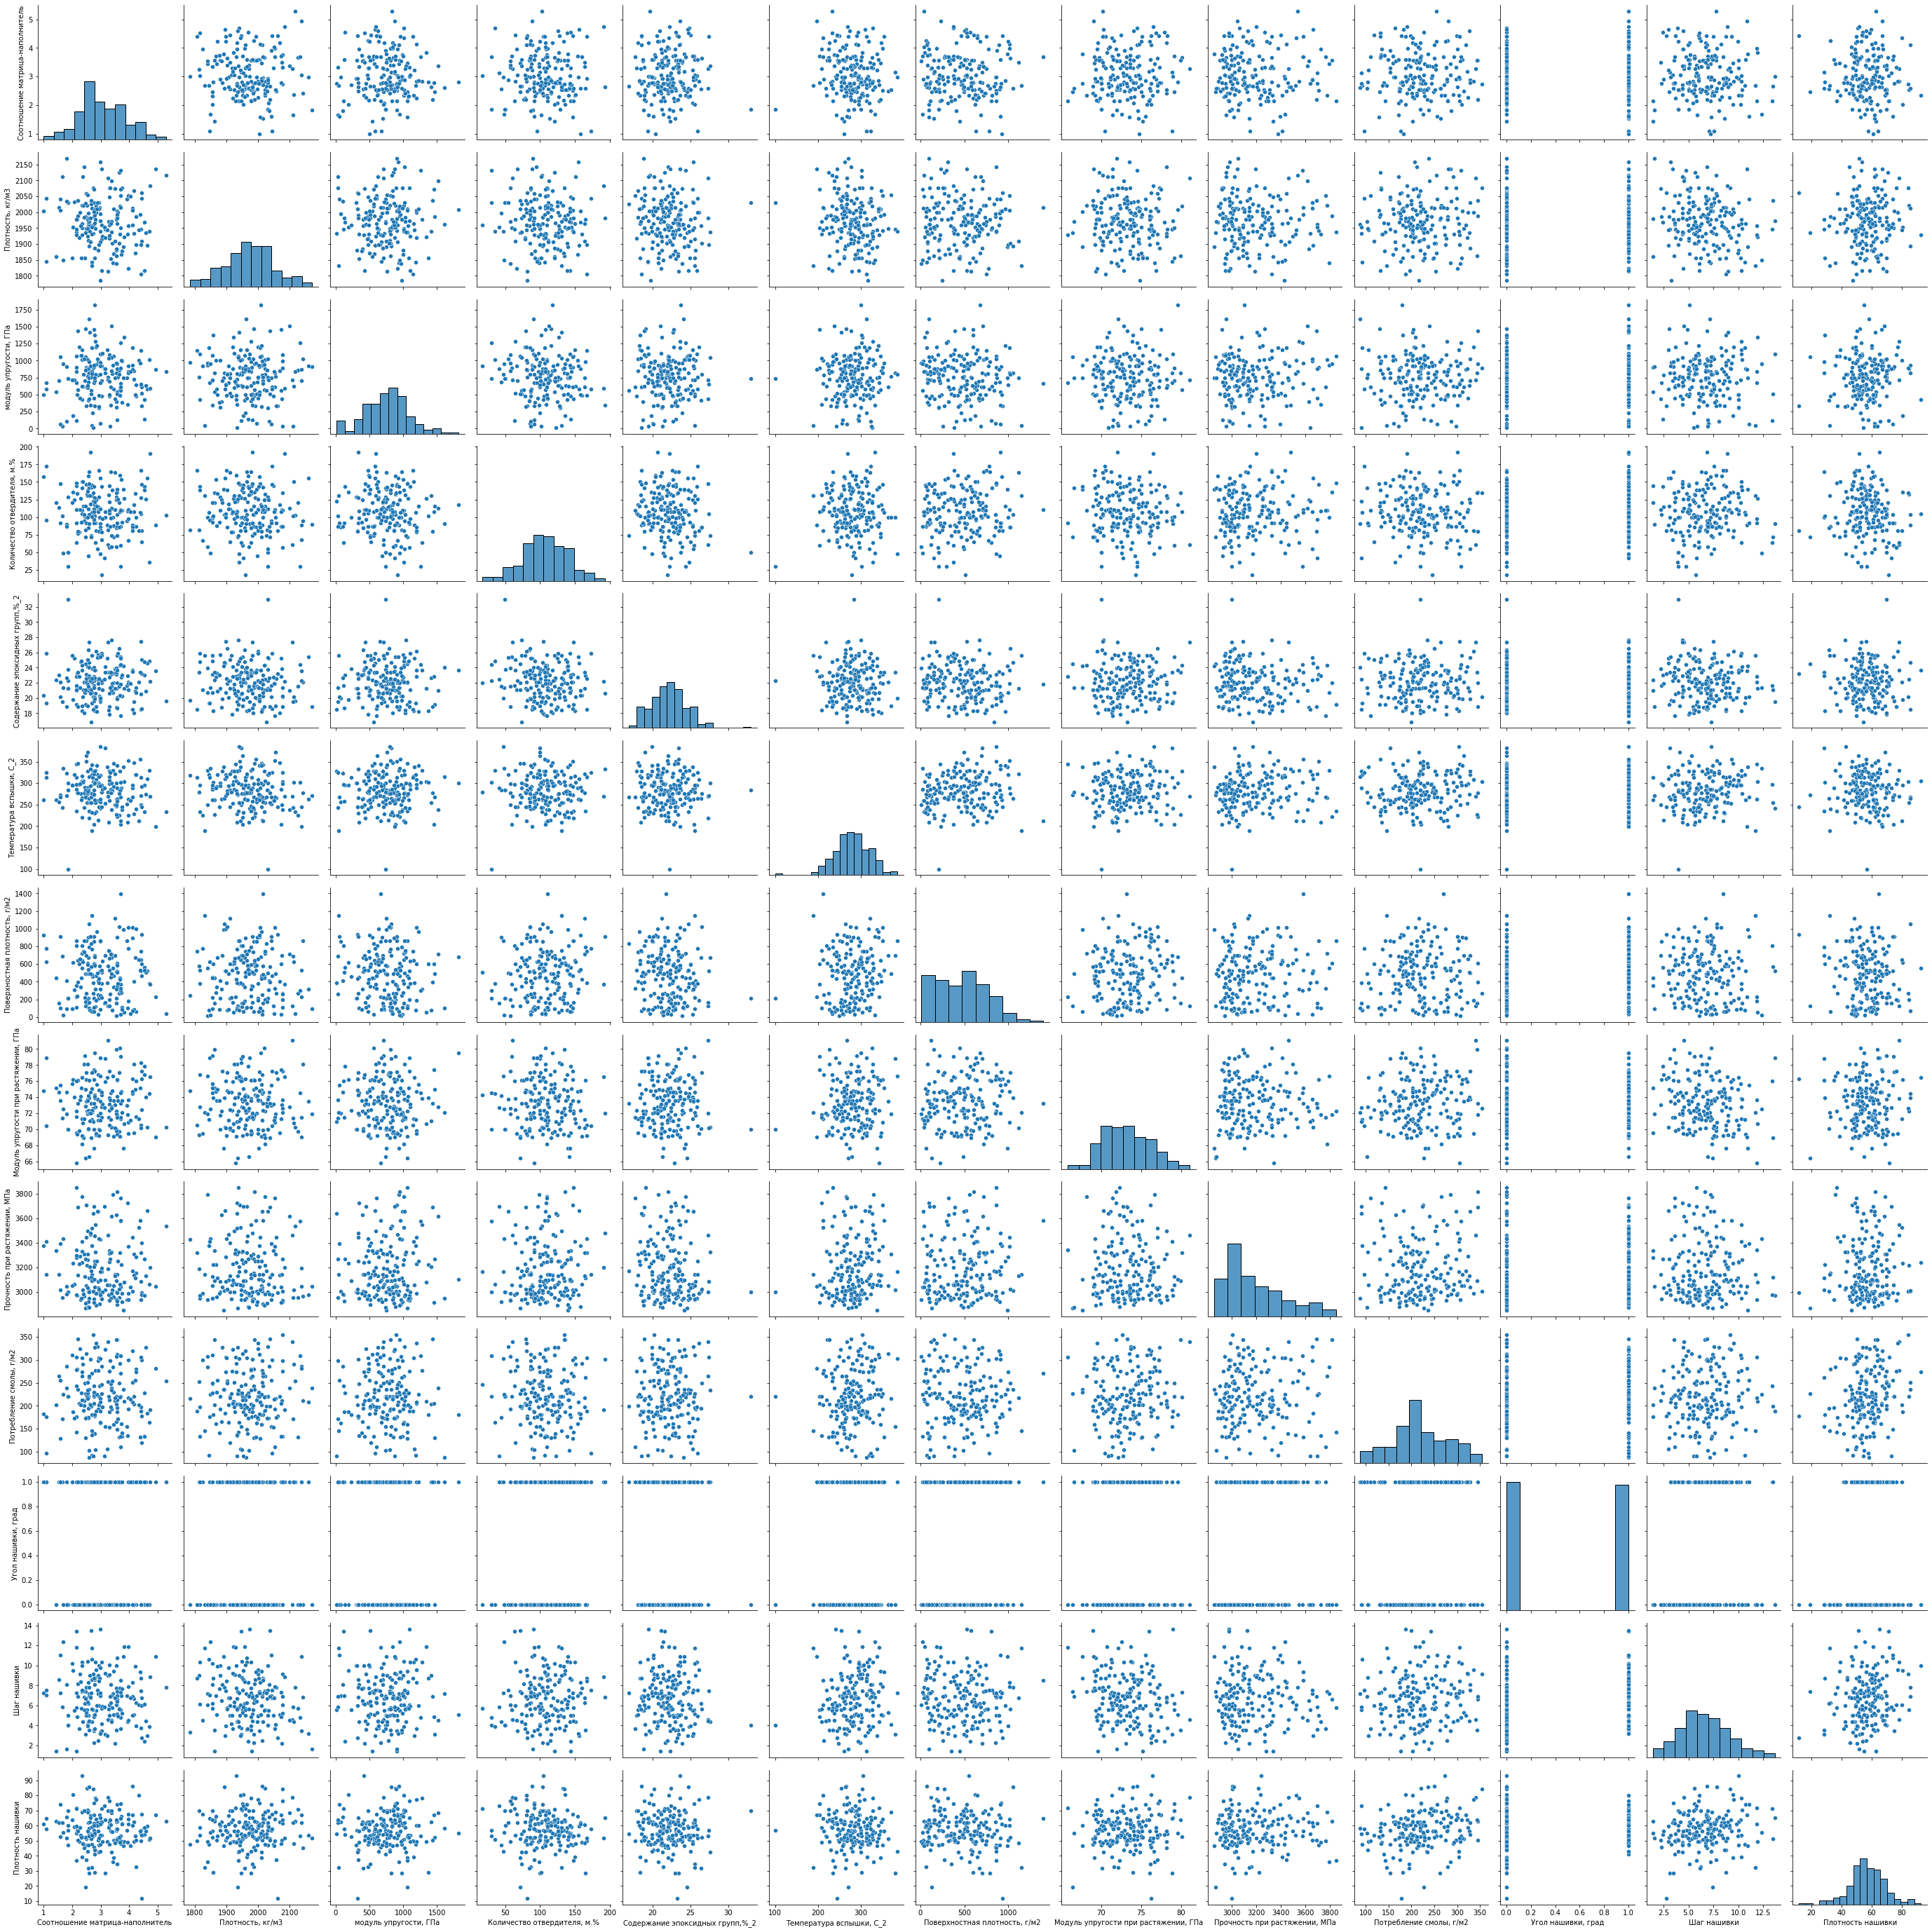

In [197]:
# Вывод парных графиков рассеяния датасета df_s, метод pairplot библиотеки seaborn
sns.pairplot(ddf_0, height=3)

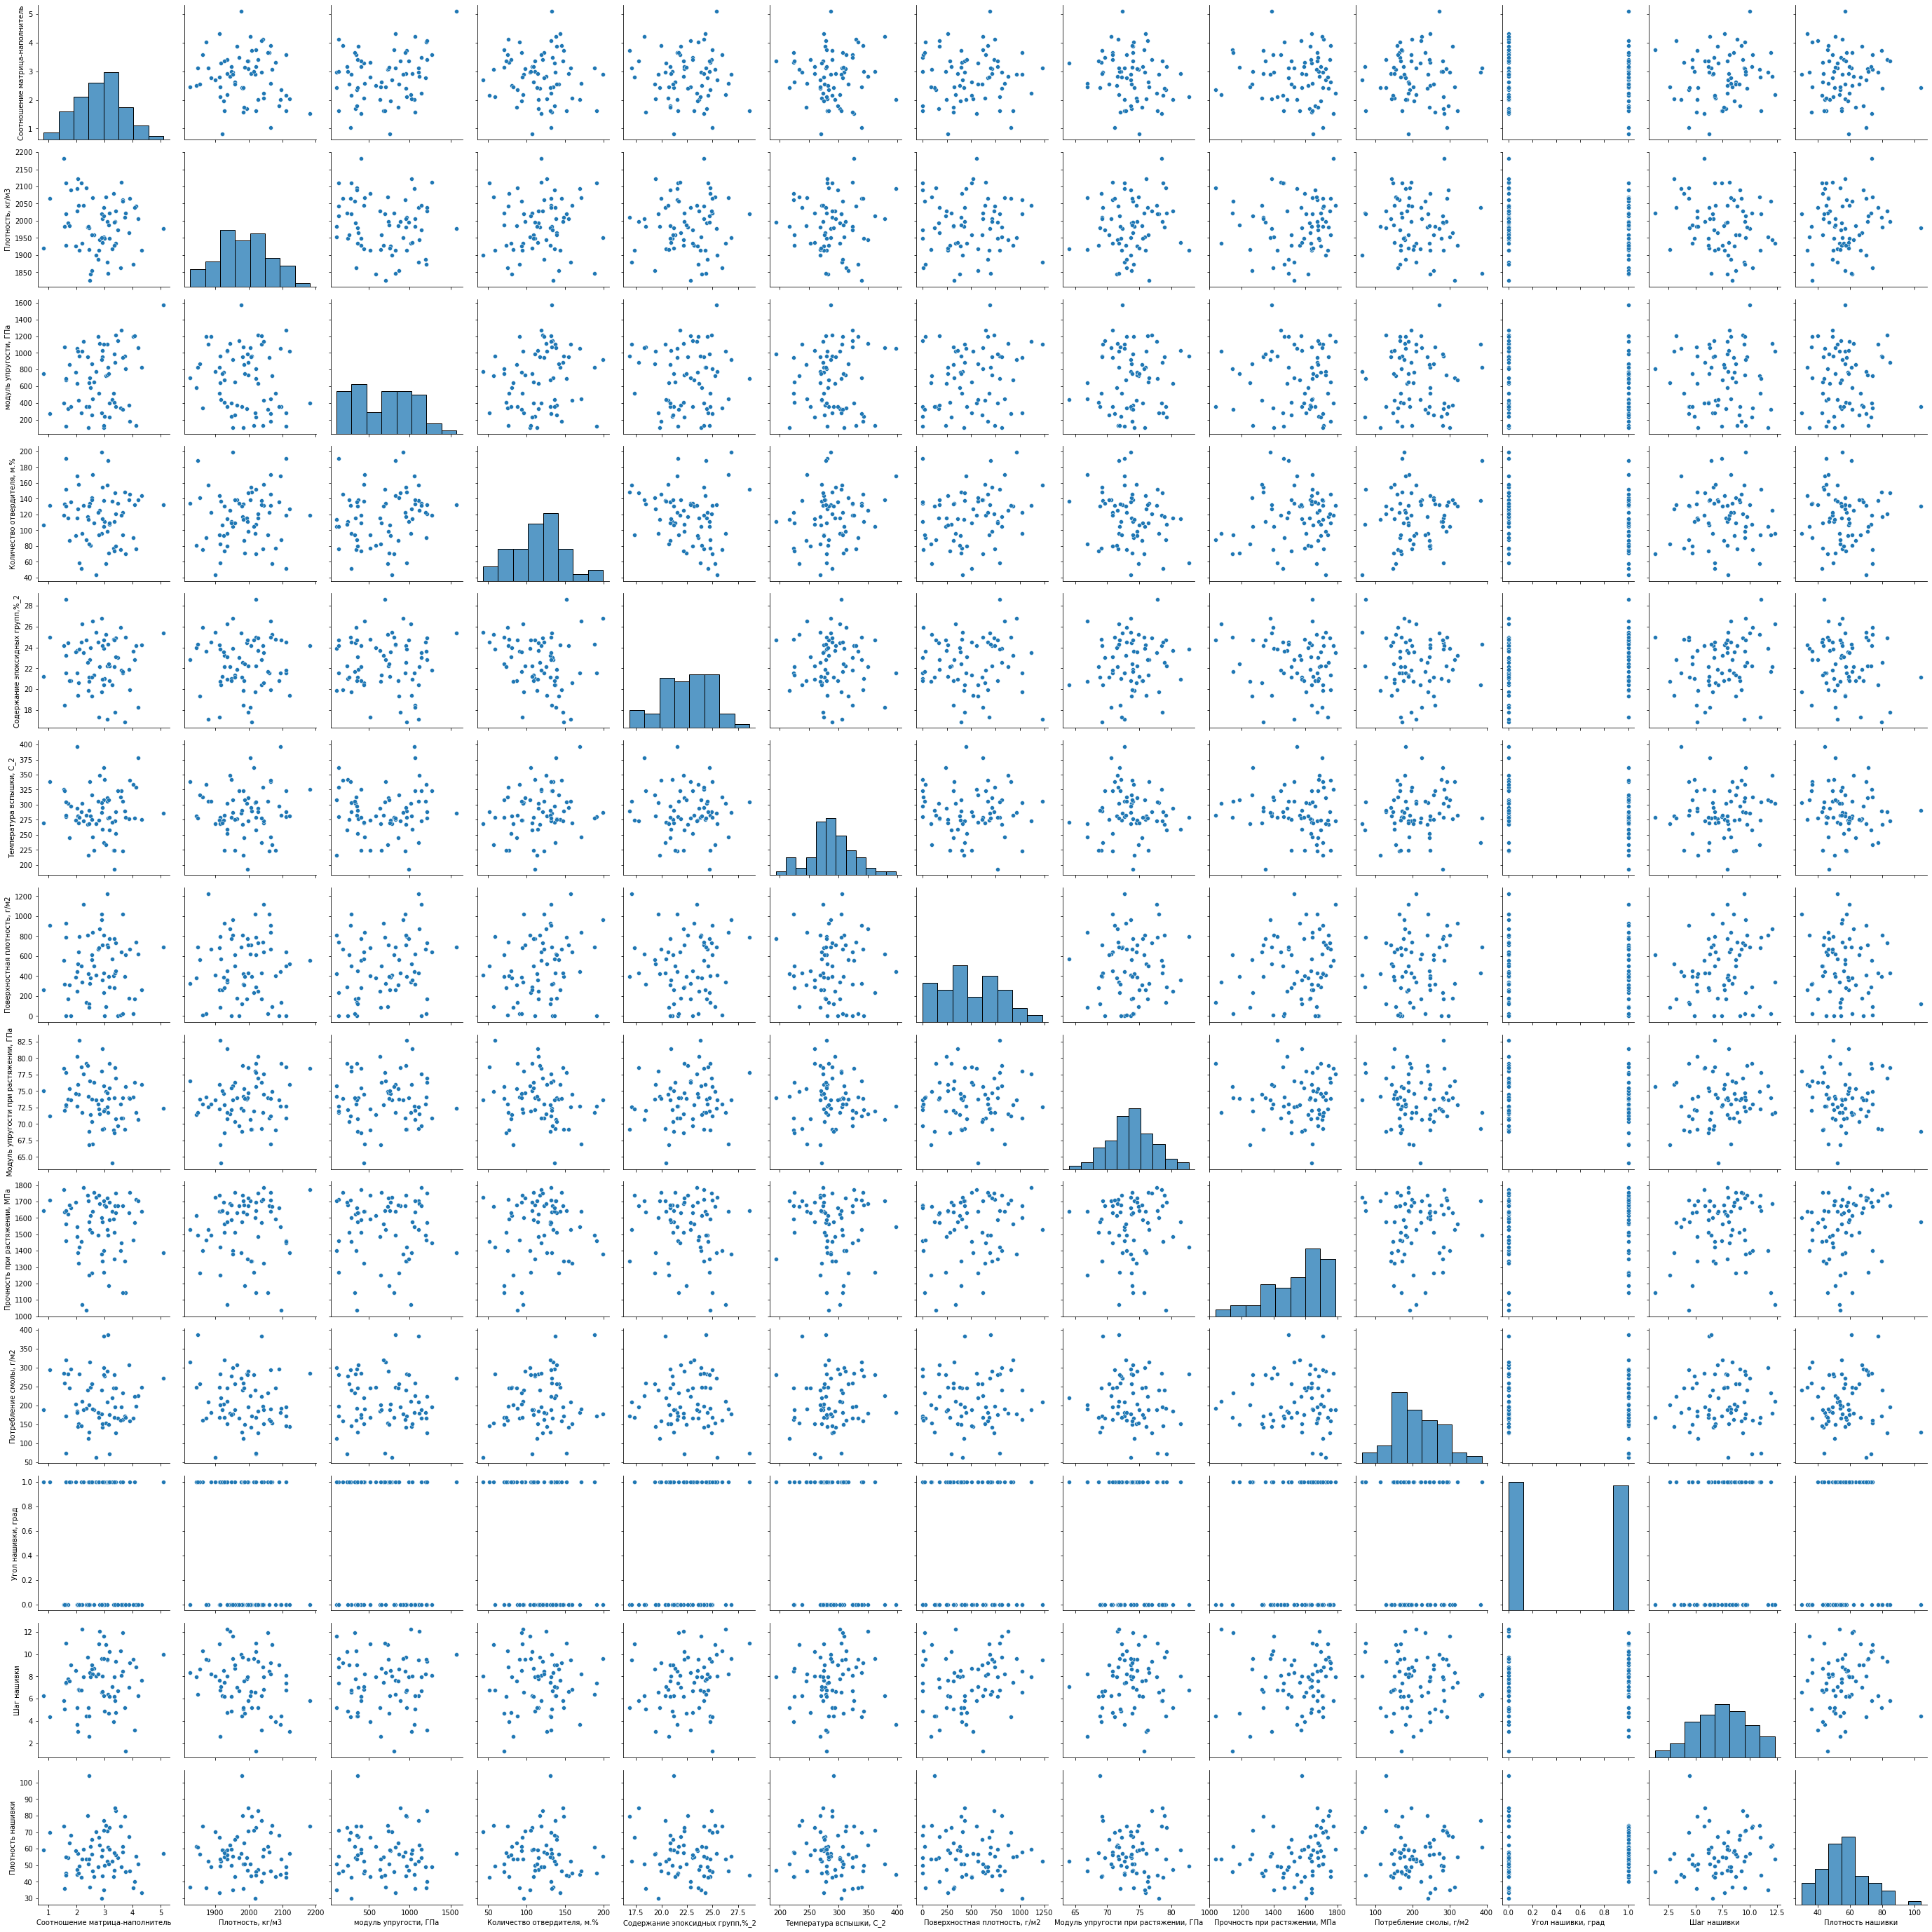

In [198]:
# Вывод парных графиков рассеяния датасета df_s, метод pairplot библиотеки seaborn
sns.pairplot(ddf_1, height=3)

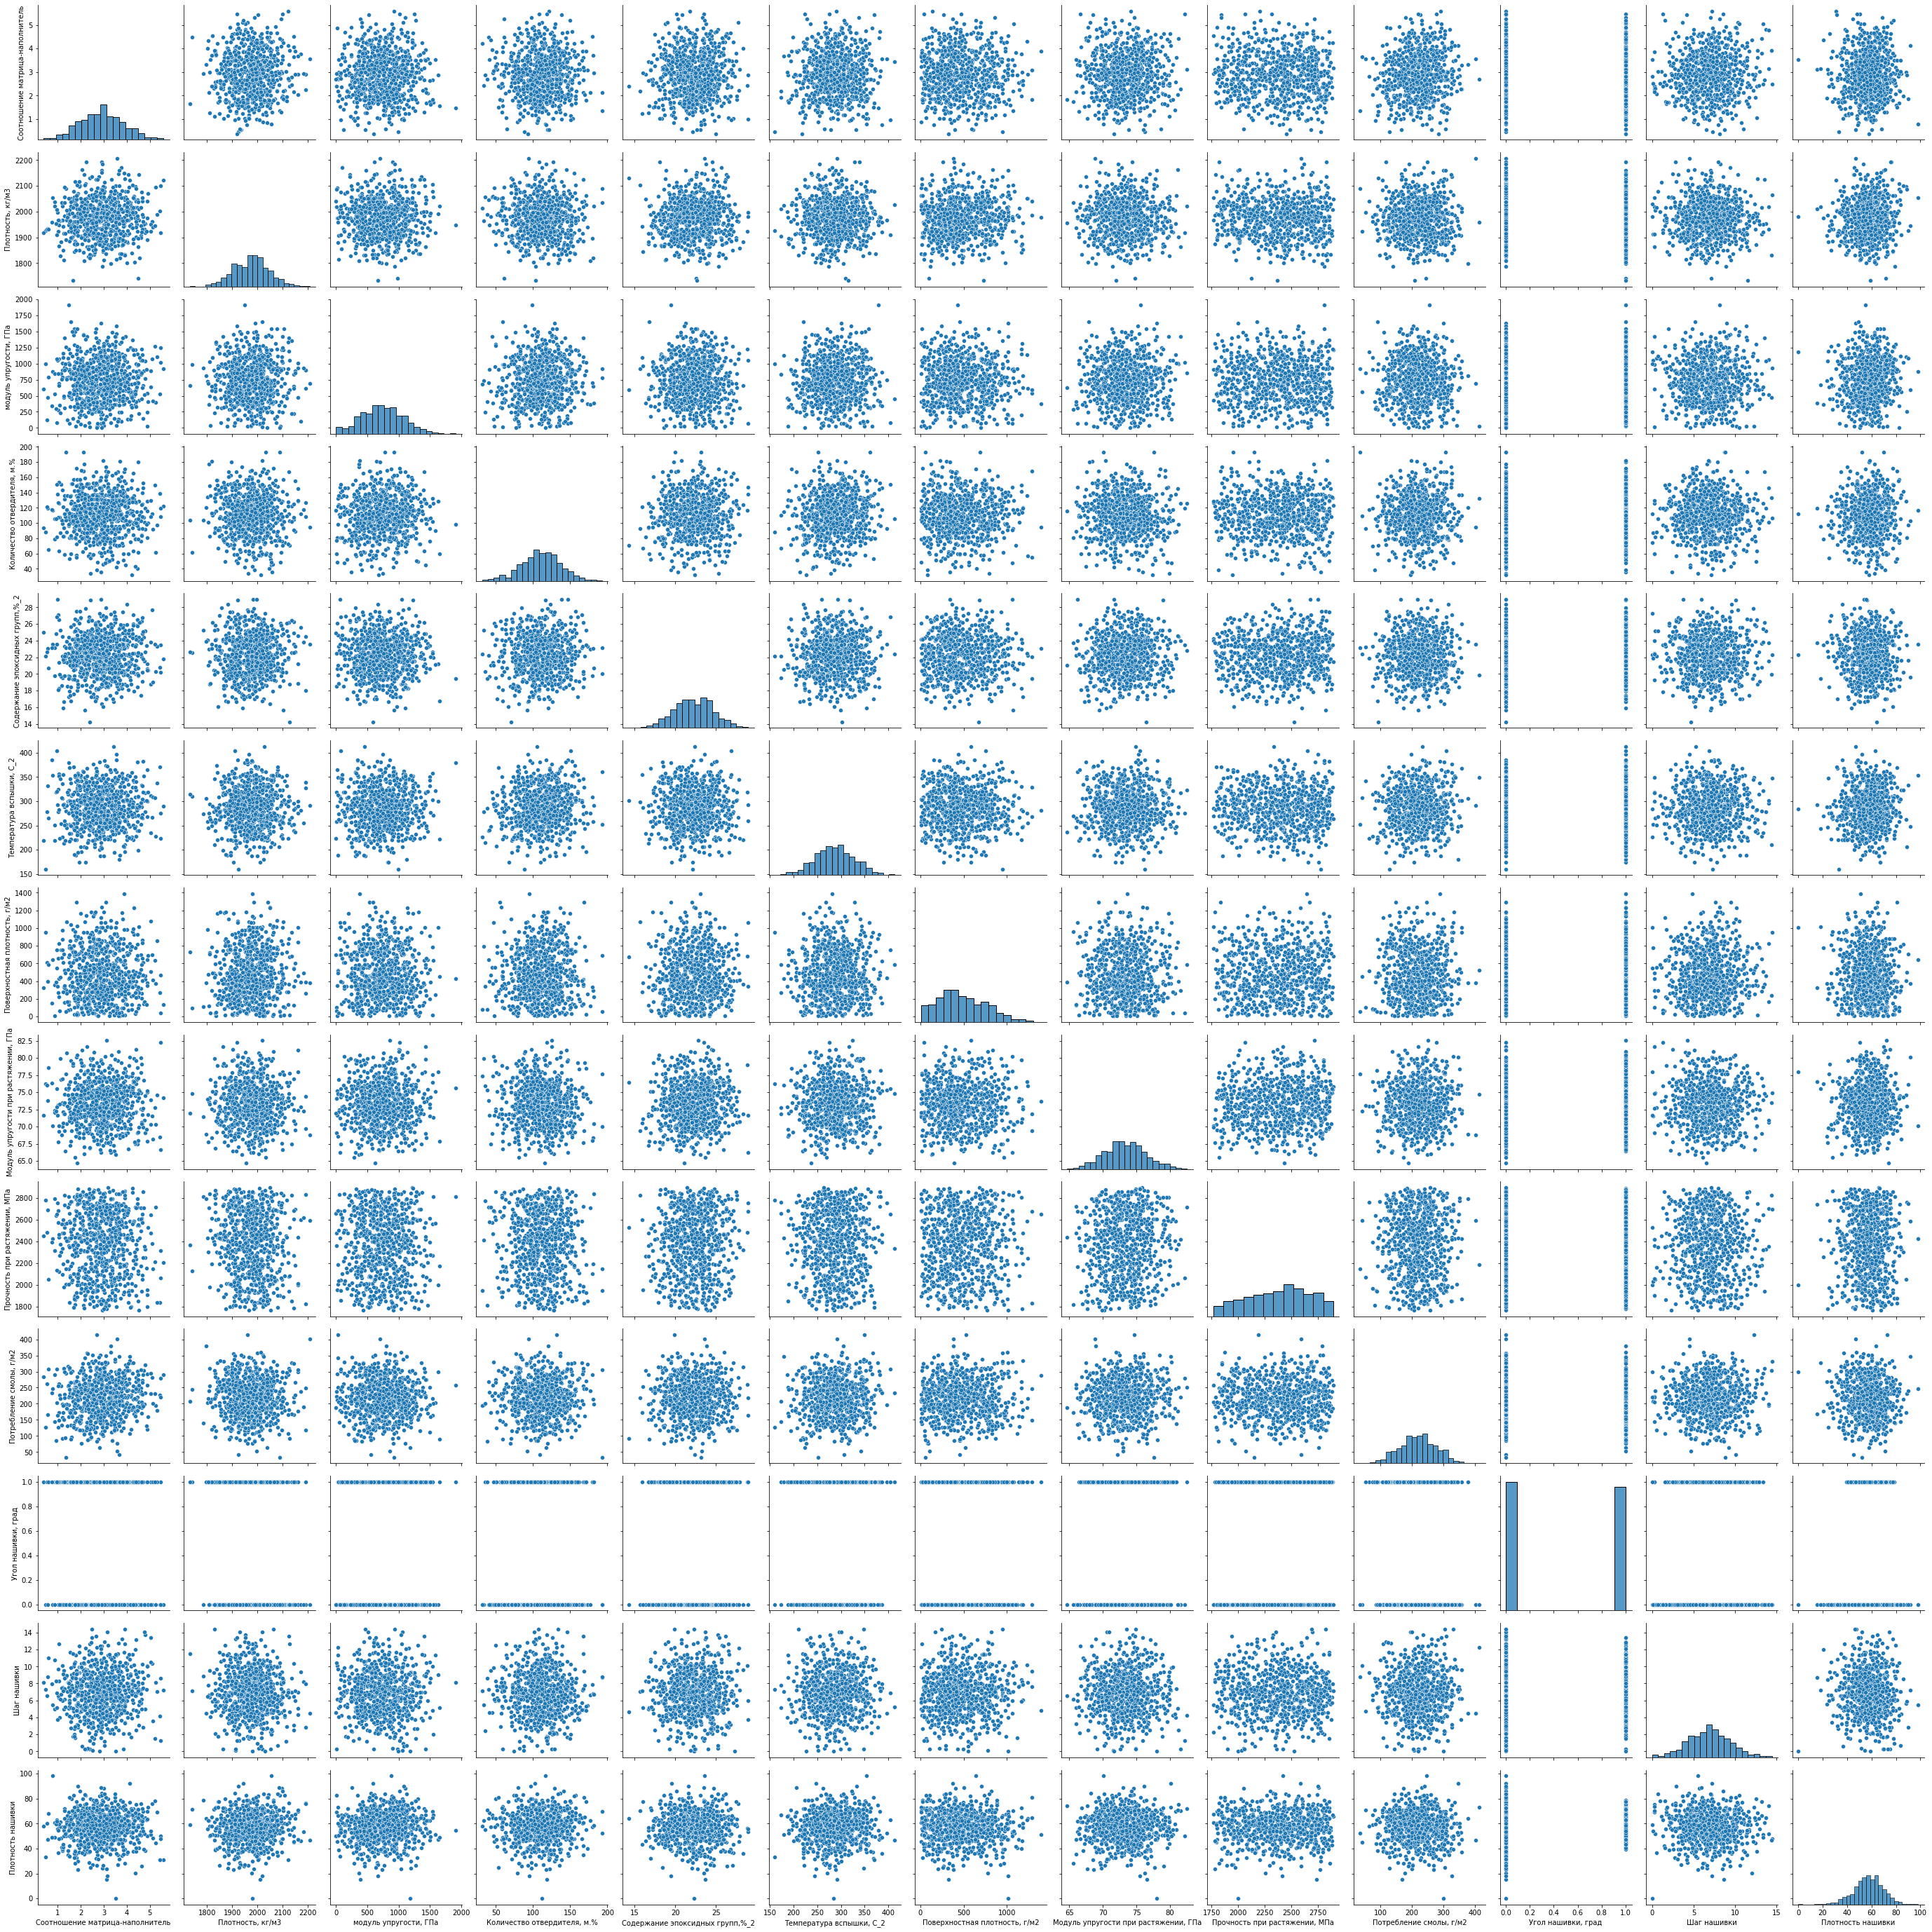

In [199]:
# Вывод парных графиков рассеяния датасета df_s, метод pairplot библиотеки seaborn
sns.pairplot(ddf_2, height=3)

In [200]:
# Вывод парных графиков рассеяния датасета df_s, метод pairplot библиотеки seaborn
#sns.pairplot(ddf_3, height=3)

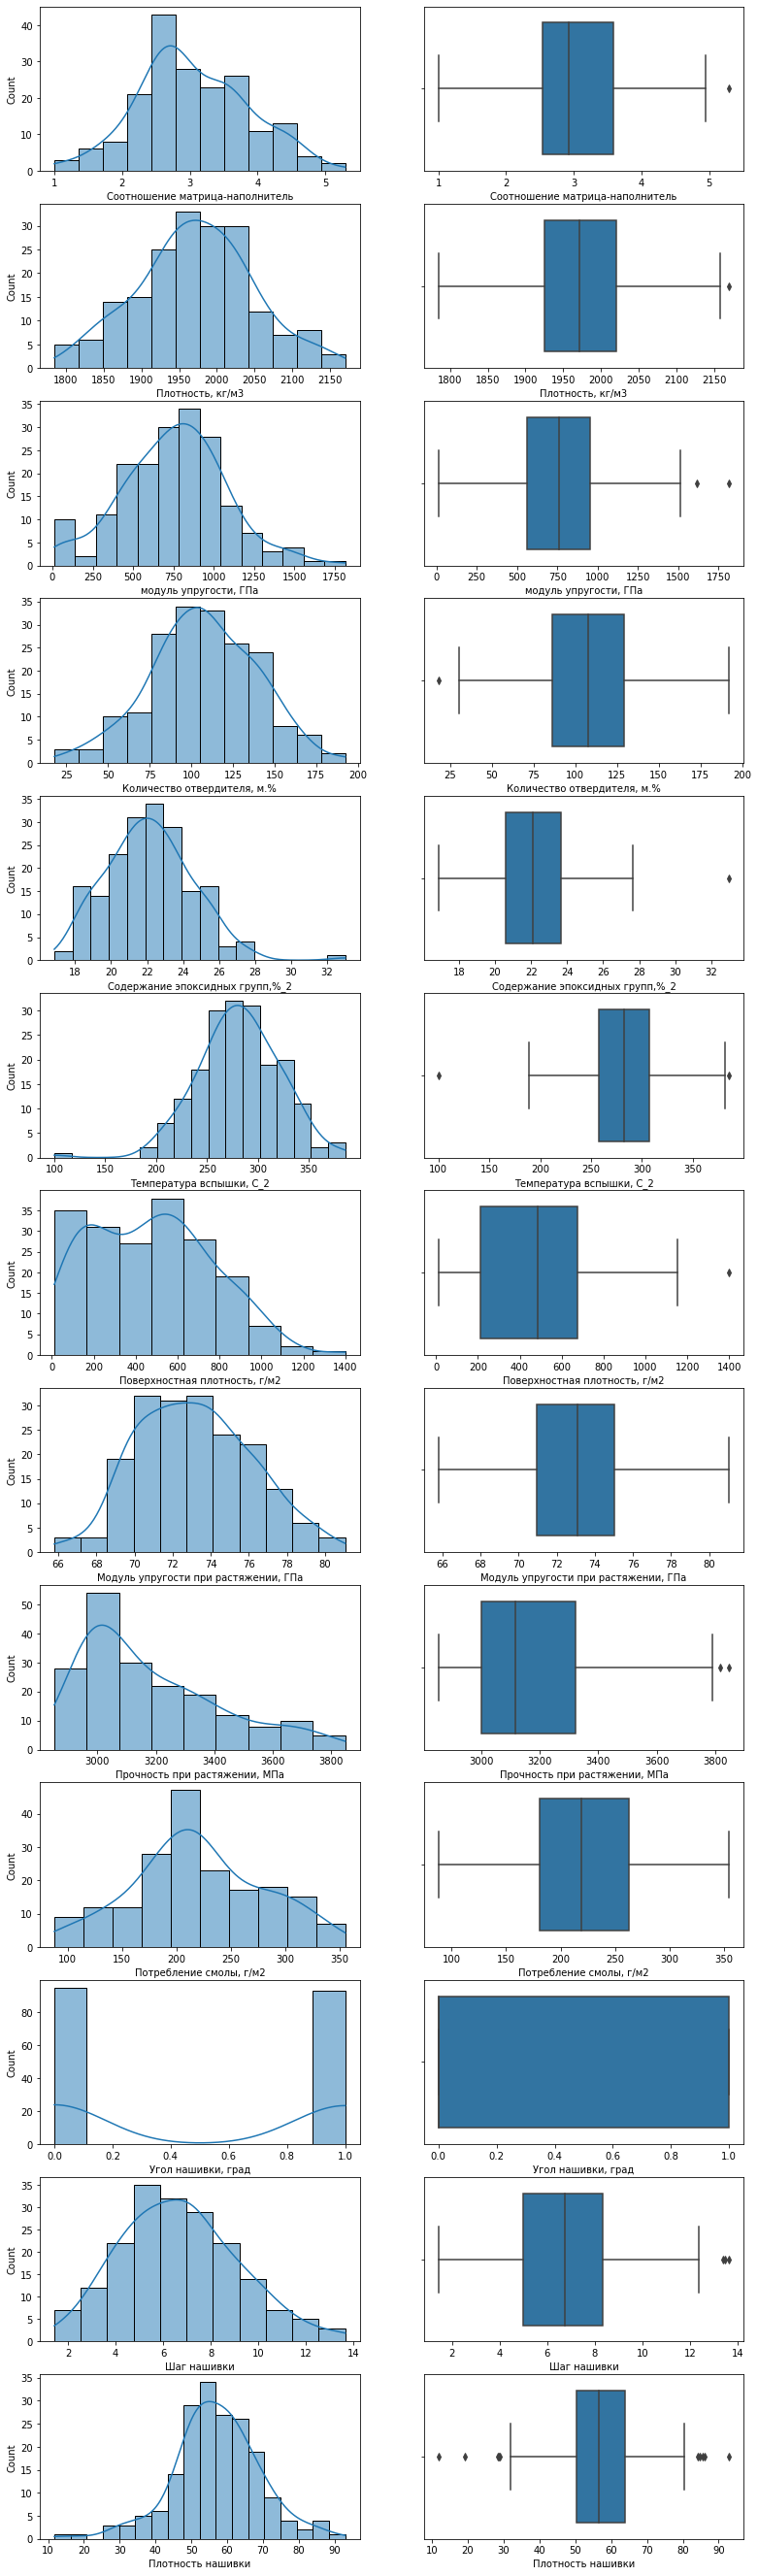

In [201]:
# Построение графиков распределения переменных и "ящики с усами", метод subplots  библиотеки seaborn
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(ddf_0.columns):    
    sns.histplot(data=ddf_0, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=ddf_0, x=column, ax=axes[k, 1])
plt.show()

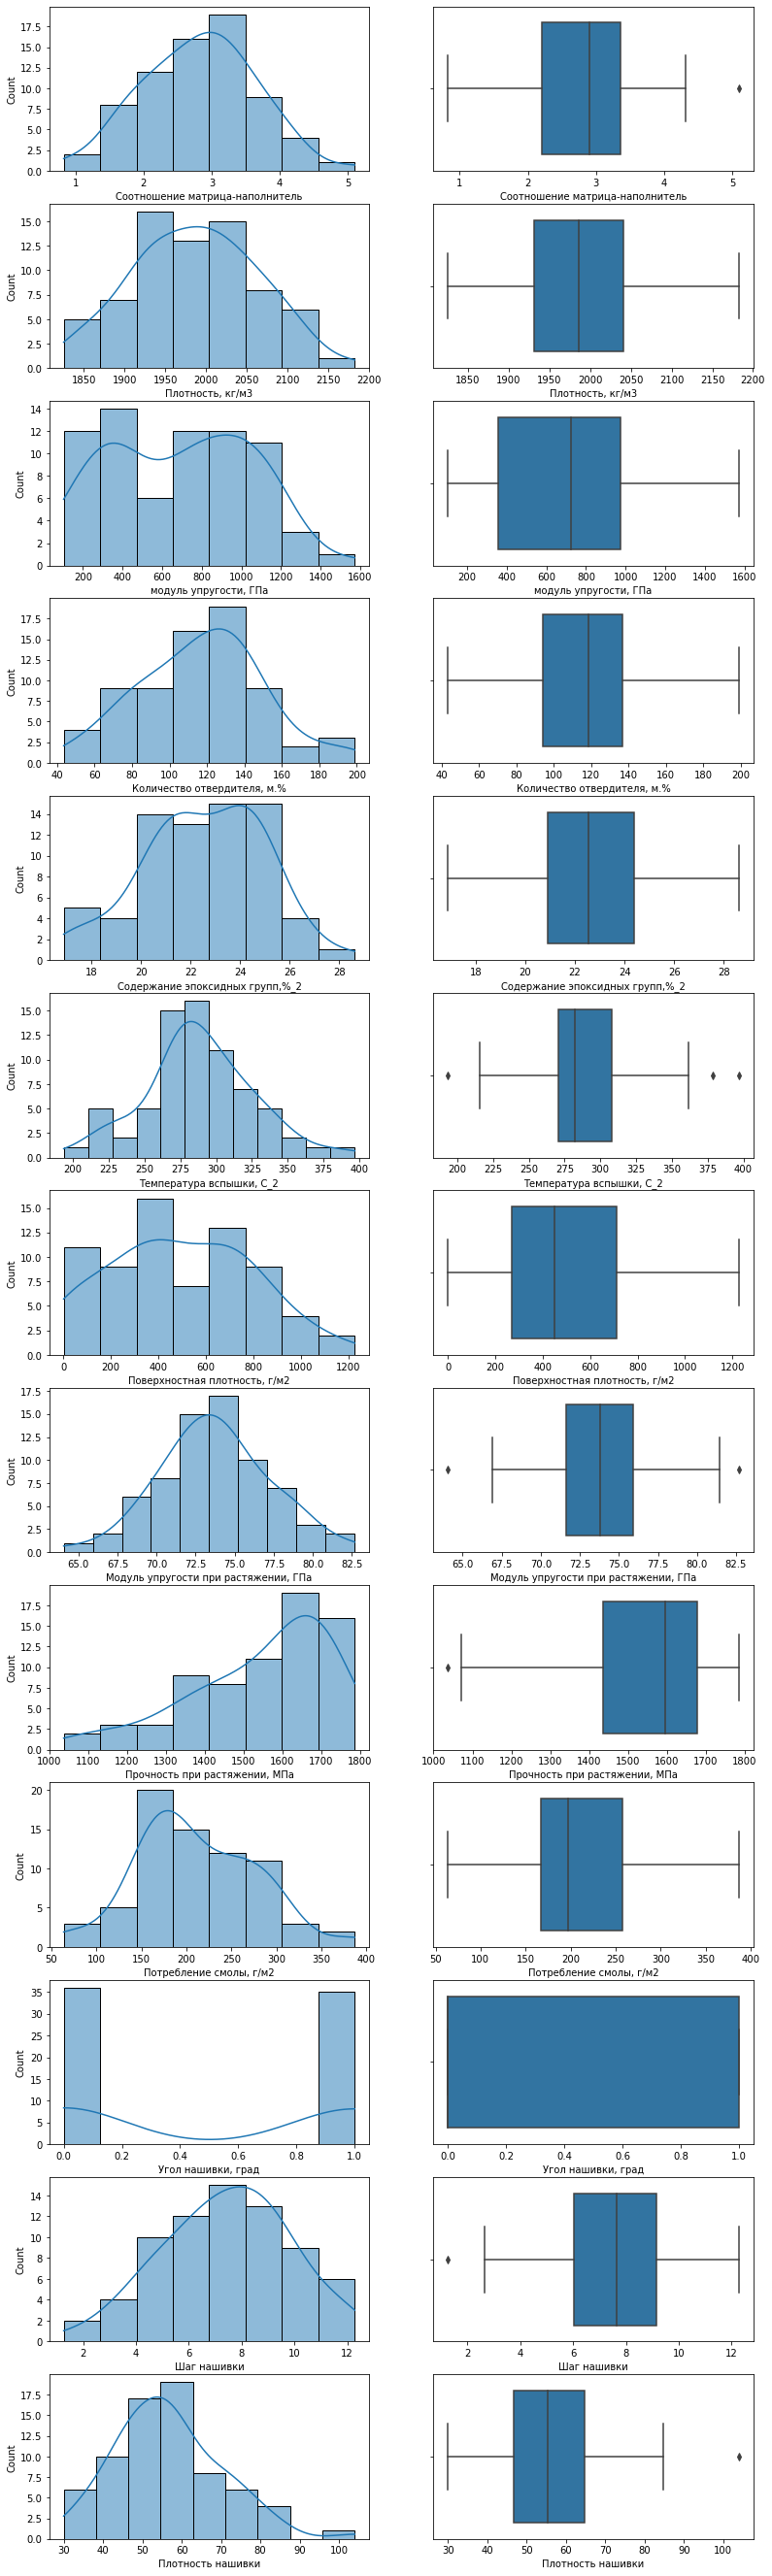

In [202]:
# Построение графиков распределения переменных и "ящики с усами", метод subplots  библиотеки seaborn
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(ddf_1.columns):    
    sns.histplot(data=ddf_1, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=ddf_1, x=column, ax=axes[k, 1])
plt.show()

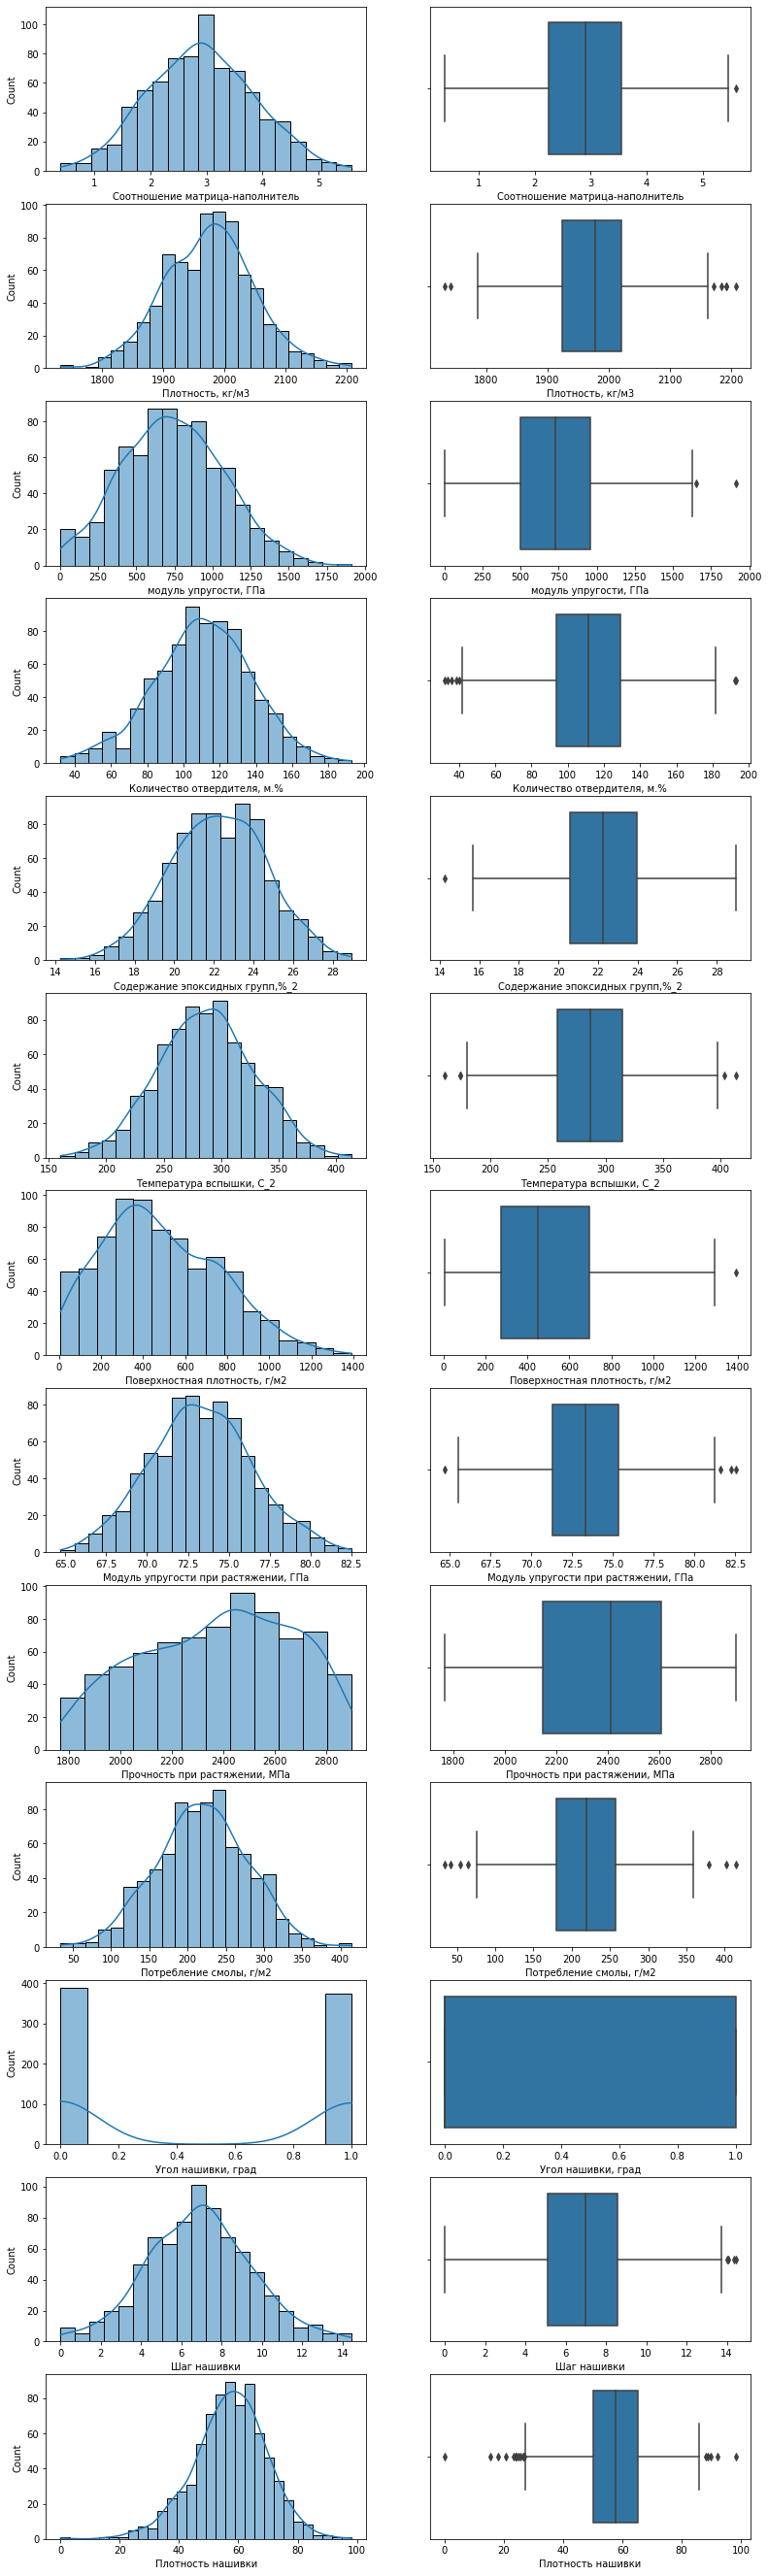

In [203]:
# Построение графиков распределения переменных и "ящики с усами", метод subplots  библиотеки seaborn
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(ddf_2.columns):    
    sns.histplot(data=ddf_2, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=ddf_2, x=column, ax=axes[k, 1])
plt.show()

In [204]:
# Построение графиков распределения переменных и "ящики с усами", метод subplots  библиотеки seaborn
#fig, axes = plt.subplots(13, 2, figsize=(13, 48))
#for k, column in enumerate(ddf_3.columns):    
#    sns.histplot(data=ddf_3, x=column, kde=True, ax=axes[k, 0])
#    sns.boxplot(data=ddf_3, x=column, ax=axes[k, 1])
#plt.show()

Параметр 'Угол нашивки' - категориальный, поэтому требуется его исключение при оценке нормальности распределения и для построения матрицы корреляции по критерию Пирсона

In [205]:
# Создание нового датасета df_d без столбца 'Угол нашивки'
ddf_0d=ddf_0[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]

In [206]:
# Создание нового датасета df_d без столбца 'Угол нашивки'
ddf_1d=ddf_1[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]

In [207]:
# Создание нового датасета df_d без столбца 'Угол нашивки'
ddf_2d=ddf_2[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]

In [208]:
# Создание нового датасета df_d без столбца 'Угол нашивки'
#ddf_3d=ddf_3[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]

In [209]:
# Вывод сведений о названиях столбцов датасета df_d, метод columns
ddf_0d.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [210]:
# Вывод сведений о названиях столбцов датасета df_d, метод columns
ddf_1d.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [211]:
# Вывод сведений о названиях столбцов датасета df_d, метод columns
ddf_2d.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [212]:
# Вывод сведений о названиях столбцов датасета df_d, метод columns
#ddf_3d.columns

### 3. Оценка корреляции параметров

Корреляция для количественных параметров и количественно-категориальных оценивается по критериям Пирсона и Спирмена соответственно

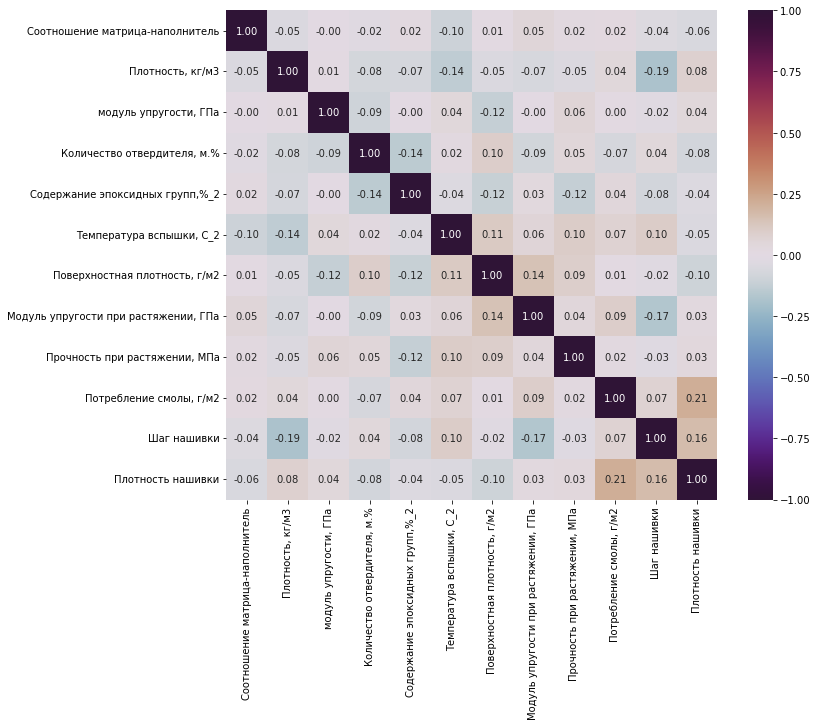

In [213]:
# Матрица корреляции по Пирсону для количественных параметров
corr = ddf_0d.corr() # Пирсон установлен по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

In [ ]:
# Проверка по критерию Пирсона
count = 0 
for col in ddf_0d.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in ddf_0d.columns[count:]:
        alpha = 0.05
        stat, p = stats.pearsonr(ddf_0d[col], ddf_0d[col1]) # Критерий Пирсона
        if p > alpha:
            print()
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))


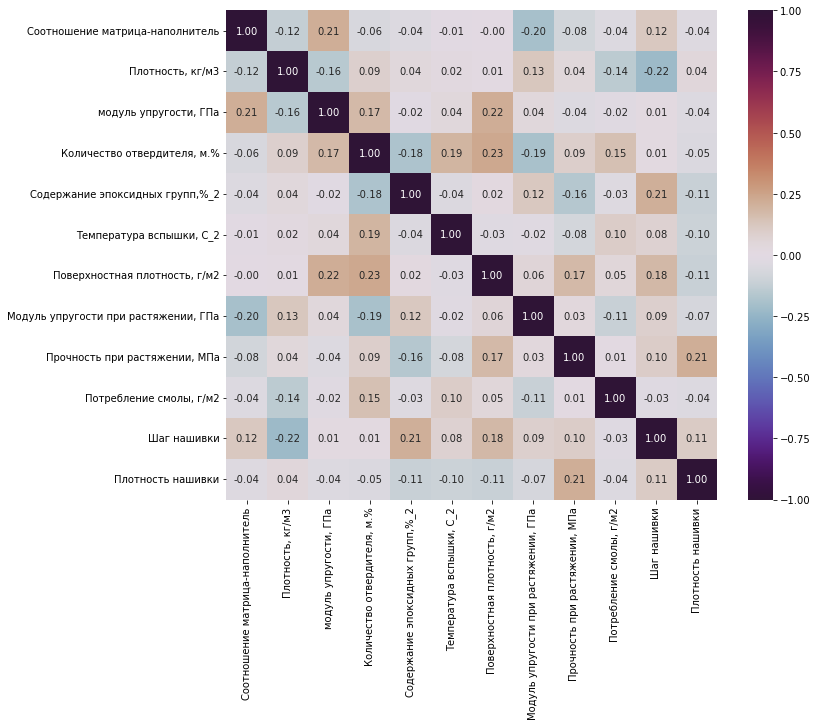

In [214]:
# Матрица корреляции по Пирсону для количественных параметров
corr = ddf_1d.corr() # Пирсон установлен по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

In [ ]:
# Проверка по критерию Пирсона
count = 0 
for col in ddf_1d.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in ddf_1d.columns[count:]:
        alpha = 0.05
        stat, p = stats.pearsonr(ddf_1d[col], ddf_1d[col1]) # Критерий Пирсона
        if p > alpha:
            print()
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))


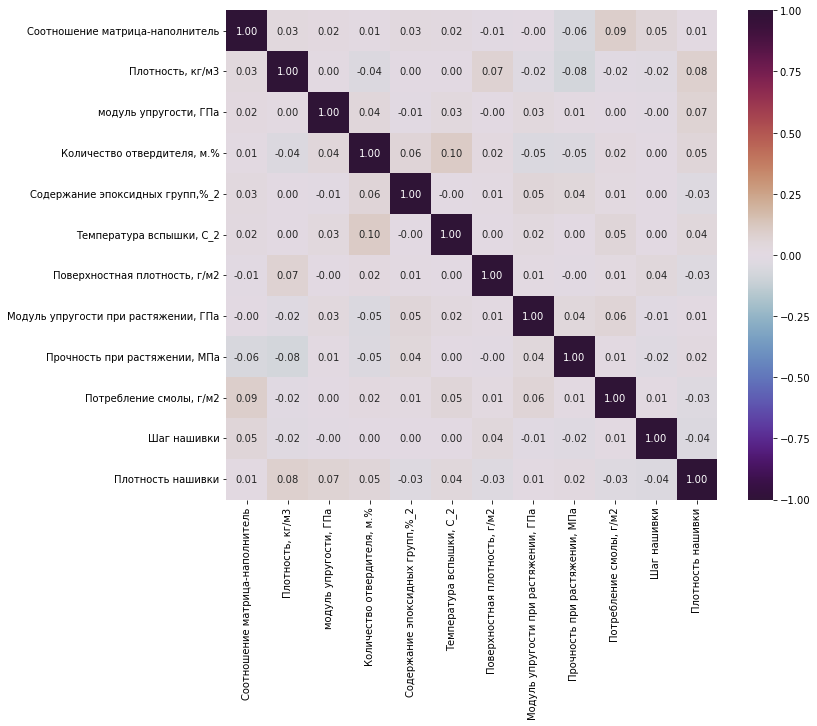

In [215]:
# Матрица корреляции по Пирсону для количественных параметров
corr = ddf_2d.corr() # Пирсон установлен по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

In [ ]:
# Проверка по критерию Пирсона
count = 0 
for col in ddf_2d.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in ddf_2d.columns[count:]:
        alpha = 0.05
        stat, p = stats.pearsonr(ddf_2d[col], ddf_2d[col1]) # Критерий Пирсона
        if p > alpha:
            print()
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))


In [216]:
# Матрица корреляции по Пирсону для количественных параметров
#corr = ddf_3d.corr() # Пирсон установлен по умолчанию
#fig, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
#plt.show()

### 5. Построение моделей статистической регрессии

In [217]:
# Загрузка библиотек sklearn для проведения регрессионного анализа
import sklearn.linear_model as lm
import statsmodels.formula.api as smf

###### Анализ общей модели множественной регрессии

In [218]:
# Создание нового датасета ff для модели множественной регрессии
ff0 = ddf_0
# Замена названия столбцов таблицы методом set_axis() для создания OLS-модели
ff0 = ff0.set_axis(['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13'], axis = 'columns')
ff0.head()

col1    col2        col3    col4       col5        col6   col7  col8  \
0  1.857143  2030.0  738.736842   30.00  22.267857  100.000000  210.0  70.0   
1  1.857143  2030.0  738.736842   50.00  23.750000  284.615385  210.0  70.0   
2  1.857143  2030.0  738.736842   49.90  33.000000  284.615385  210.0  70.0   
3  1.857143  2030.0  738.736842  129.00  21.250000  300.000000  210.0  70.0   
4  2.771331  2030.0  753.000000  111.86  22.267857  284.615385  210.0  70.0   

     col9  col10  col11  col12  col13  
0  3000.0  220.0      0    4.0   57.0  
1  3000.0  220.0      0    4.0   60.0  
2  3000.0  220.0      0    4.0   70.0  
3  3000.0  220.0      0    5.0   47.0  
4  3000.0  220.0      0    5.0   57.0

In [219]:
# Создание нового датасета ff для модели множественной регрессии
ff1 = ddf_1
# Замена названия столбцов таблицы методом set_axis() для создания OLS-модели
ff1 = ff1.set_axis(['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13'], axis = 'columns')
ff1.head()

col1         col2         col3        col4       col5        col6  \
0  5.098993  1977.339047  1572.096042  132.343060  25.397001  286.556431   
1  4.315666  1913.379677   822.918735  143.576937  24.275588  274.988794   
2  1.705194  1993.624087   334.893406  115.482321  24.461134  302.348496   
3  3.725152  2009.398720   962.774186  148.316386  16.869670  289.236170   
4  2.965812  1952.017898   105.154467  104.486677  23.898728  308.473989   

         col7       col8         col9       col10  col11      col12      col13  
0  690.364836  72.341640  1386.578973  271.901394      1  10.000000  57.000000  
1  260.859341  75.957329  1639.912525  248.244330      0   7.656211  33.571024  
2  168.599067  73.781178  1624.720533  283.289007      0   7.782711  54.633818  
3  398.919838  69.204642  1337.424692  172.549269      0   5.182935  79.514070  
4  808.806264  75.825484  1400.357932  300.499628      0  11.644048  34.929572

In [220]:
# Создание нового датасета ff для модели множественной регрессии
ff2 = ddf_2
# Замена названия столбцов таблицы методом set_axis() для создания OLS-модели
ff2 = ff2.set_axis(['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13'], axis = 'columns')
ff2.head()

col1    col2    col3    col4       col5        col6    col7  col8  \
0  2.561475  1900.0   535.0  111.86  22.267857  284.615385   380.0  75.0   
1  3.557018  1930.0   889.0  129.00  21.250000  300.000000   380.0  75.0   
2  3.532338  2100.0  1421.0  129.00  21.250000  300.000000  1010.0  78.0   
3  2.919678  2160.0   933.0  129.00  21.250000  300.000000  1010.0  78.0   
4  2.877358  1990.0  1628.0  129.00  21.250000  300.000000  1010.0  78.0   

     col9  col10  col11  col12  col13  
0  1800.0  120.0      0    7.0   47.0  
1  1800.0  120.0      0    7.0   57.0  
2  2000.0  300.0      0    7.0   60.0  
3  2000.0  300.0      0    7.0   70.0  
4  2000.0  300.0      0    9.0   47.0

In [221]:
# Создание нового датасета ff для модели множественной регрессии
ff3 = ddf_3
# Замена названия столбцов таблицы методом set_axis() для создания OLS-модели
ff3 = ff3.set_axis(['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13'], axis = 'columns')
ff3.head()

Empty DataFrame
Columns: [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13]
Index: []

In [222]:
# Замена категориальных переменых порядковыми переменными, метод concat, 
# Dummy variables, аргумент get_dummies
ff0 = pd.concat((ff0,pd.get_dummies(ff0.col11, prefix="col11", prefix_sep='',)),1)
ff0.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12032\3663672012.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ff0 = pd.concat((ff0,pd.get_dummies(ff0.col11, prefix="col11", prefix_sep='',)),1)


col1    col2        col3    col4       col5        col6   col7  col8  \
0  1.857143  2030.0  738.736842   30.00  22.267857  100.000000  210.0  70.0   
1  1.857143  2030.0  738.736842   50.00  23.750000  284.615385  210.0  70.0   
2  1.857143  2030.0  738.736842   49.90  33.000000  284.615385  210.0  70.0   
3  1.857143  2030.0  738.736842  129.00  21.250000  300.000000  210.0  70.0   
4  2.771331  2030.0  753.000000  111.86  22.267857  284.615385  210.0  70.0   

     col9  col10  col11  col12  col13  col110  col111  
0  3000.0  220.0      0    4.0   57.0       1       0  
1  3000.0  220.0      0    4.0   60.0       1       0  
2  3000.0  220.0      0    4.0   70.0       1       0  
3  3000.0  220.0      0    5.0   47.0       1       0  
4  3000.0  220.0      0    5.0   57.0       1       0

In [223]:
# Замена категориальных переменых порядковыми переменными, метод concat, 
# Dummy variables, аргумент get_dummies
ff1 = pd.concat((ff1,pd.get_dummies(ff1.col11, prefix="col11", prefix_sep='',)),1)
ff1.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12032\2177107136.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ff1 = pd.concat((ff1,pd.get_dummies(ff1.col11, prefix="col11", prefix_sep='',)),1)


col1         col2         col3        col4       col5        col6  \
0  5.098993  1977.339047  1572.096042  132.343060  25.397001  286.556431   
1  4.315666  1913.379677   822.918735  143.576937  24.275588  274.988794   
2  1.705194  1993.624087   334.893406  115.482321  24.461134  302.348496   
3  3.725152  2009.398720   962.774186  148.316386  16.869670  289.236170   
4  2.965812  1952.017898   105.154467  104.486677  23.898728  308.473989   

         col7       col8         col9       col10  col11      col12  \
0  690.364836  72.341640  1386.578973  271.901394      1  10.000000   
1  260.859341  75.957329  1639.912525  248.244330      0   7.656211   
2  168.599067  73.781178  1624.720533  283.289007      0   7.782711   
3  398.919838  69.204642  1337.424692  172.549269      0   5.182935   
4  808.806264  75.825484  1400.357932  300.499628      0  11.644048   

       col13  col110  col111  
0  57.000000       0       1  
1  33.571024       1       0  
2  54.633818       1       0  
3  79.514070       1       0  
4  34.929572       1       0

In [224]:
# Замена категориальных переменых порядковыми переменными, метод concat, 
# Dummy variables, аргумент get_dummies
ff2 = pd.concat((ff2,pd.get_dummies(ff2.col11, prefix="col11", prefix_sep='',)),1)
ff2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12032\1420413336.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ff2 = pd.concat((ff2,pd.get_dummies(ff2.col11, prefix="col11", prefix_sep='',)),1)


col1    col2    col3    col4       col5        col6    col7  col8  \
0  2.561475  1900.0   535.0  111.86  22.267857  284.615385   380.0  75.0   
1  3.557018  1930.0   889.0  129.00  21.250000  300.000000   380.0  75.0   
2  3.532338  2100.0  1421.0  129.00  21.250000  300.000000  1010.0  78.0   
3  2.919678  2160.0   933.0  129.00  21.250000  300.000000  1010.0  78.0   
4  2.877358  1990.0  1628.0  129.00  21.250000  300.000000  1010.0  78.0   

     col9  col10  col11  col12  col13  col110  col111  
0  1800.0  120.0      0    7.0   47.0       1       0  
1  1800.0  120.0      0    7.0   57.0       1       0  
2  2000.0  300.0      0    7.0   60.0       1       0  
3  2000.0  300.0      0    7.0   70.0       1       0  
4  2000.0  300.0      0    9.0   47.0       1       0

In [225]:
# Замена категориальных переменых порядковыми переменными, метод concat, 
# Dummy variables, аргумент get_dummies
ff3 = pd.concat((ff3,pd.get_dummies(ff3.col11, prefix="col11", prefix_sep='',)),1)
ff3.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12032\347822830.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  ff3 = pd.concat((ff3,pd.get_dummies(ff3.col11, prefix="col11", prefix_sep='',)),1)


Empty DataFrame
Columns: [col1, col2, col3, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13]
Index: []

In [226]:
# Модель OLS множественной регрессии для параметра 'col8' - 'Модуль упругости при растяжении, ГПа'
resultsm = smf.ols('col8 ~ col1 + col2 + col3 + col4 + col5 + col6 + col7 + col9 + col10 + col12 + col13 + col110', data=ff0).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col8   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.357
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.191
Time:                        00:42:26   Log-Likelihood:                -463.12
No. Observations:                 188   AIC:                             952.2
Df Residuals:                     175   BIC:                             994.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.8280      7.884      9.999      0.000      63.269      94.387
col1           0.1467      0.268      0.547      0.585      -0.383       0.676
col2          -0.0040      0.003     -1.357      0.177      -0.010       0.002
col3       -2.169e-05      0.001     -0.032      0.975      -0.001       0.001
col4          -0.0086      0.007     -1.230      0.220      -0.022       0.005
col5           0.0133      0.093      0.143      0.887      -0.170       0.197
col6           0.0036      0.006      0.659      0.511      -0.007       0.015
col7           0.0014      0.001      1.760      0.080      -0.000       0.003
col9           0.0002      0.001      0.254      0.800      -0.002       0.002
col10          0.0043      0.004      1.170      0.244      -0.003       0.012
col12         -0.2433      0.091     -2.669      0.008      -0.423      -0.063
col13          0.0139      0.019      0.742      0.459      -0.023       0.051
col110        -0.2184      0.444     -0.492      0.623      -1.094       0.657
==============================================================================
Omnibus:                        2.250   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.316
Skew:                           0.242   Prob(JB):                        0.314
Kurtosis:                       2.753   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
# Модель OLS множественной регрессии для параметра 'col8' - 'Модуль упругости при растяжении, ГПа'
resultsm = smf.ols('col8 ~ col1 + col2 + col3 + col4 + col5 + col6 + col7 + col9 + col10 + col12 + col13 + col110', data=ff1).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col8   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.019
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.444
Time:                        00:42:26   Log-Likelihood:                -183.21
No. Observations:                  71   AIC:                             392.4
Df Residuals:                      58   BIC:                             421.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.4500     14.013      4.599      0.000      36.400      92.500
col1          -1.0834      0.536     -2.021      0.048      -2.156      -0.010
col2           0.0064      0.006      1.047      0.299      -0.006       0.019
col3           0.0012      0.001      0.915      0.364      -0.001       0.004
col4          -0.0299      0.014     -2.088      0.041      -0.059      -0.001
col5           0.0440      0.187      0.236      0.814      -0.330       0.418
col6          -0.0021      0.012     -0.181      0.857      -0.026       0.022
col7           0.0005      0.002      0.353      0.725      -0.003       0.004
col9           0.0009      0.002      0.357      0.723      -0.004       0.006
col10         -0.0033      0.007     -0.494      0.623      -0.016       0.010
col12          0.2425      0.198      1.225      0.225      -0.154       0.639
col13         -0.0251      0.033     -0.760      0.450      -0.091       0.041
col110         0.9877      0.938      1.053      0.297      -0.889       2.865
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   2.409
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.202
Skew:                           0.067   Prob(JB):                        0.904
Kurtosis:                       2.776   Cond. No.                     8.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
# Модель OLS множественной регрессии для параметра 'col8' - 'Модуль упругости при растяжении, ГПа'
resultsm = smf.ols('col8 ~ col1 + col2 + col3 + col4 + col5 + col6 + col7 + col9 + col10 + col12 + col13 + col110', data=ff2).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   col8   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9003
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.546
Time:                        00:42:26   Log-Likelihood:                -1945.5
No. Observations:                 764   AIC:                             3917.
Df Residuals:                     751   BIC:                             3977.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.2658      3.607     20.033      0.000      65.184      79.347
col1          -0.0127      0.121     -0.105      0.917      -0.250       0.224
col2          -0.0010      0.002     -0.635      0.526      -0.004       0.002
col3           0.0003      0.000      0.857      0.392      -0.000       0.001
col4          -0.0069      0.004     -1.612      0.107      -0.015       0.001
col5           0.0736      0.047      1.564      0.118      -0.019       0.166
col6           0.0019      0.003      0.682      0.495      -0.004       0.007
col7           0.0001      0.000      0.252      0.801      -0.001       0.001
col9           0.0003      0.000      0.757      0.449      -0.000       0.001
col10          0.0032      0.002      1.670      0.095      -0.001       0.007
col12         -0.0151      0.044     -0.345      0.730      -0.101       0.071
col13          0.0032      0.009      0.347      0.729      -0.015       0.022
col110        -0.1821      0.229     -0.796      0.426      -0.631       0.267
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.753
Skew:                           0.096   Prob(JB):                        0.252
Kurtosis:                       2.777   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
# Модель OLS множественной регрессии для параметра 'col8' - 'Модуль упругости при растяжении, ГПа'
#resultsm = smf.ols('col8 ~ col1 + col2 + col3 + col4 + col5 + col6 + col7 + col9 + col10 + col12 + col13 + col110', data=ff3).fit()
#resultsm.summary()

Вывод: значима модель только для датасета ddf_2d, R-squared несколько возрос - до 0,033 - 0,075; некоторые параметры значимы:  для датасета ddf_0d параметры незначимы;

'col4', 'col9' - 'Количество отвердителя, м.%', 'Прочность при растяжении, МПа' для датасета ddf_1d;

'col9' - 'Прочность при растяжении, МПа' для датасета ddf_2d


#### 6. Нормализация значений параметров с помощью метода MinMaxScaler

In [230]:
# Загрузка MinMaxScaler из библиотеки sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

Датасет ddf_1d

In [231]:
# Применение MinMaxScaler для нормализации датасета df
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(ddf_1d), columns = ddf_1d.columns, index=ddf_1d.index)

In [232]:
# Описательная статистика нормализованного датасета df
df_norm.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                        71.000000         71.000000   
mean                          0.466002          0.453073   
std                           0.193979          0.213536   
min                           0.000000          0.000000   
25%                           0.324372          0.297777   
50%                           0.486025          0.450055   
75%                           0.592928          0.602487   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count              71.000000                    71.000000   
mean                0.400199                     0.472976   
std                 0.243676                     0.211213   
min                 0.000000                     0.000000   
25%                 0.173178                     0.324501   
50%                 0.424168                     0.484328   
75%                 0.593131                     0.600916   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                        71.000000                 71.000000   
mean                          0.481508                  0.467185   
std                           0.209440                  0.186377   
min                           0.000000                  0.000000   
25%                           0.341717                  0.380201   
50%                           0.482642                  0.437177   
75%                           0.640737                  0.563506   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                      71.000000                             71.000000   
mean                        0.402620                              0.518889   
std                         0.246888                              0.190058   
min                         0.000000                              0.000000   
25%                         0.220717                              0.407300   
50%                         0.367434                              0.521717   
75%                         0.578143                              0.635460   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
count                      71.000000                71.000000    71.000000   
mean                        0.675728                 0.456321     0.561267   
std                         0.242651                 0.205734     0.218170   
min                         0.000000                 0.000000     0.000000   
25%                         0.531510                 0.320906     0.431309   
50%                         0.746076                 0.411751     0.580405   
75%                         0.857789                 0.600005     0.715345   
max                         1.000000                 1.000000     1.000000   

       Плотность нашивки  
count          71.000000  
mean            0.361063  
std             0.184902  
min             0.000000  
25%             0.227058  
50%             0.342103  
75%             0.468104  
max             1.000000

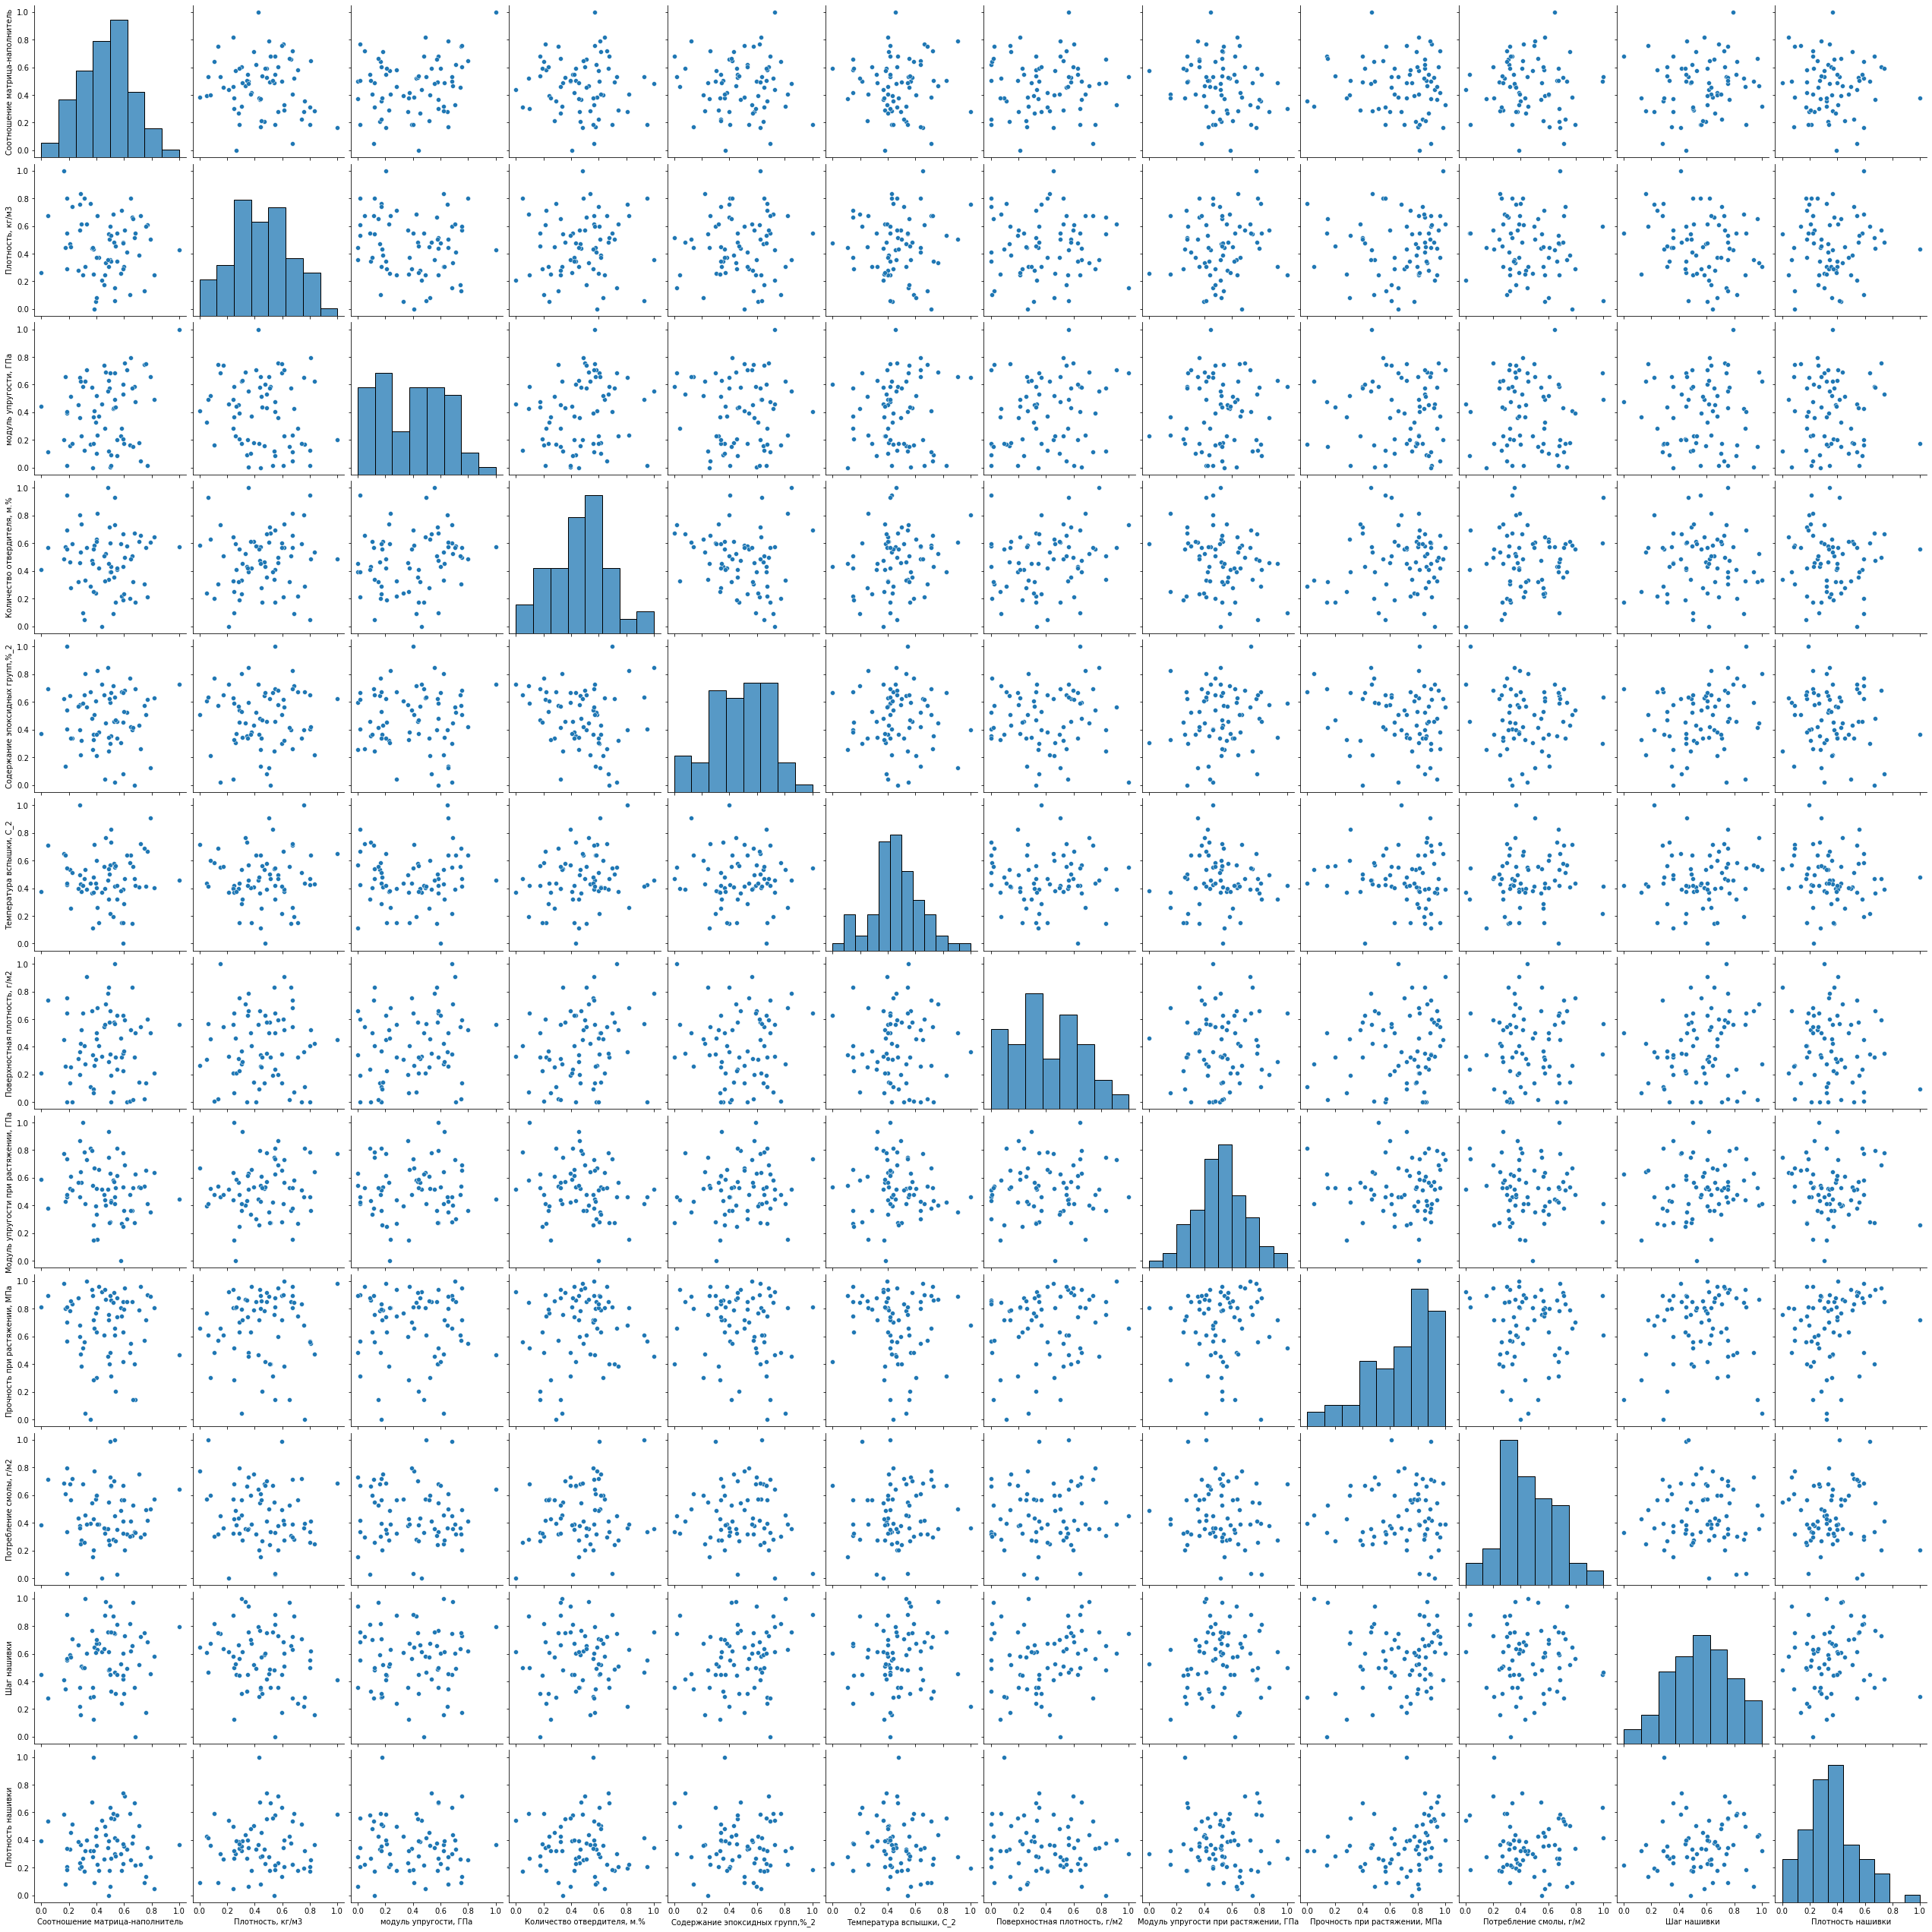

In [233]:
# Попарные графики рассеяния после нормализации
sns.pairplot(df_norm, height=3)

In [234]:
# Создание датасета df для моделей прогноза
df = df_norm.copy()

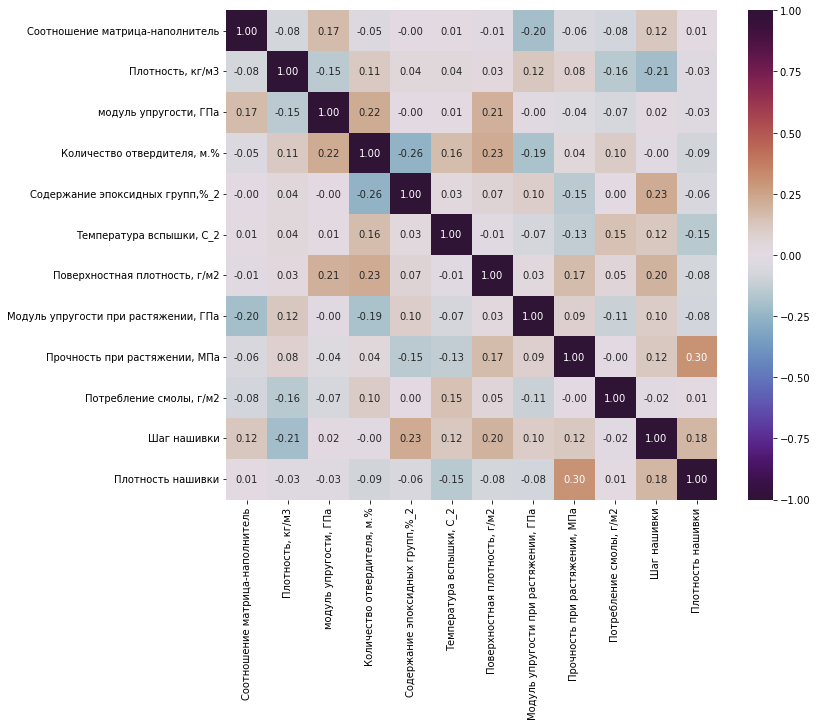

In [235]:
# Матрица корреляции по Спирмену после нормализации
corr = df_norm.corr(method = 'spearman') # Спирмен
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

In [236]:
# Параметр 'Угол нашивки, град' - категориальный, поэтому его исключаем 
# при построении матрицы корреляции по критерию Пирсона
df_dnorm=df_norm[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Шаг нашивки','Плотность нашивки']]
df_dnorm

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.000000          0.425389               1.000000   
1                          0.816636          0.246473               0.490146   
2                          0.205567          0.470944               0.158019   
3                          0.678406          0.515071               0.585324   
4                          0.500657          0.354557               0.001669   
..                              ...               ...                    ...   
66                         0.601290          0.307483               0.172654   
67                         0.000000          0.265136               0.442879   
68                         0.756735          0.596863               0.751393   
69                         0.591921          0.287934               0.206896   
70                         0.547070          0.346629               0.202568   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                      0.571635                         0.725703   
1                      0.643879                         0.630267   
2                      0.463205                         0.646058   
3                      0.674358                         0.000000   
4                      0.392493                         0.598195   
..                          ...                              ...   
66                     0.232791                         0.527643   
67                     0.407309                         0.368846   
68                     0.569314                         0.509437   
69                     0.191814                         0.451758   
70                     0.420257                         0.337987   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                   0.457692                       0.562318   
1                   0.400840                       0.212170   
2                   0.535307                       0.136956   
3                   0.470863                       0.324721   
4                   0.565413                       0.658875   
..                       ...                            ...   
66                  0.287479                       0.367434   
67                  0.377522                       0.211860   
68                  0.416651                       0.140271   
69                  0.152025                       0.229264   
70                  0.419264                       0.628320   

    Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               0.444899                       0.466909   
1                               0.638999                       0.805130   
2                               0.522177                       0.784847   
3                               0.276497                       0.401284   
4                               0.631921                       0.485305   
..                                   ...                            ...   
66                              0.361630                       0.796472   
67                              0.587362                       0.813552   
68                              0.655746                       0.716919   
69                              0.247972                       0.632204   
70                              0.615094                       0.739543   

    Потребление смолы, г/м2  Шаг нашивки  Плотность нашивки  
0                  0.644196     0.793162           0.365356  
1                  0.571004     0.580405           0.048919  
2                  0.679428     0.591888           0.333398  
3                  0.336812     0.355894           0.669437  
4                  0.732676     0.942401           0.067268  
..                      ...          ...                ...  
66                 0.564327     0.314032           0.352983  
67                 0.386559     0.451122           0.395598  
68        

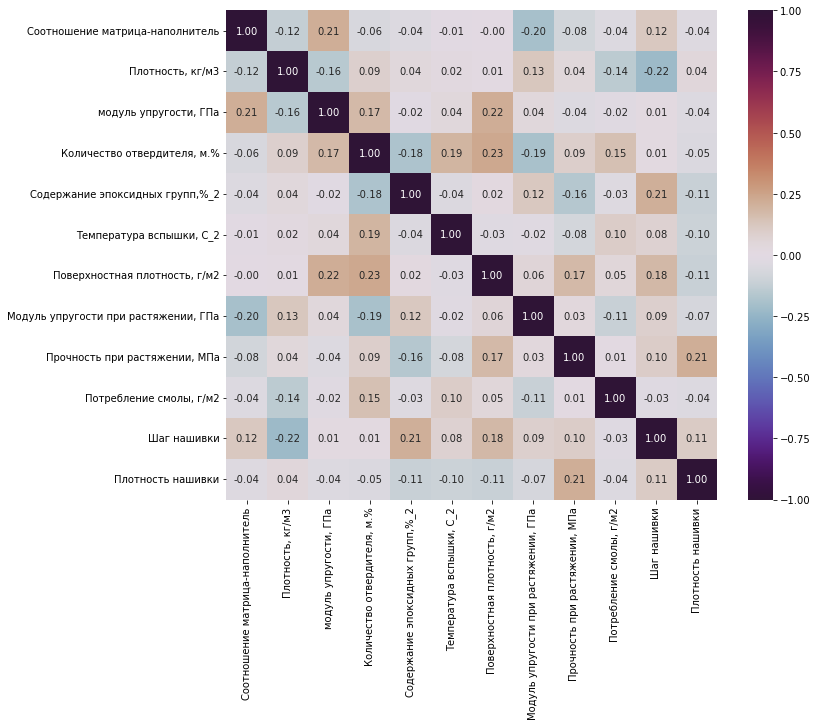

In [237]:
# Матрица корреляции по Пирсону после нормализации
corr = df_dnorm.corr() # Пирсон по умолчанию
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

#### 3. Модели для прогноза модуля упругости при растяжении и прочности при растяжении

In [238]:
# Загрузка модулей библиотеки sklearn для регрессоров и других библиотек
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

###### Разбиение данных на обучающую и тестовую выборки

In [239]:
# Назначение переменных для создания моделей
x_upr = df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df[['Модуль упругости при растяжении, ГПа']]
y_pr = df[['Прочность при растяжении, МПа']]
# Разбиение данных на обучающую и тестовую выборки
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

###### Метод К ближайших соседей

In [240]:
# Регрессор KNeighborsRegressor() для расчета методом K-ближайших соседей,
# используются унифицированные веса и настройки алгоритма по умолчанию
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
# используется поиск по сетке GridSearchCV для upr          }
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-3.81542441 -3.81542441 -1.04235726 ...         nan         nan
         nan]
  warnings.warn(


{'algorithm': 'auto', 'n_neighbors': 43, 'weights': 'uniform'}

In [241]:
# Поиск по лучшей модели и вывод результатов для upr
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: -0.073


In [242]:
# Создание объекта pandas DataFrame()
models = pd.DataFrame()

In [243]:
# Запись результатов расчета в DataFrame()
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [244]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_upr_result])

In [245]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.138317    -0.073

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [246]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-1.21899575 -1.21899575 -1.14711947 ...         nan         nan
         nan]
  warnings.warn(


{'algorithm': 'ball_tree', 'n_neighbors': 31, 'weights': 'distance'}

In [247]:
# Поиск по лучшей модели и вывод результатов для pr
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.159


In [248]:
# Запись результатов расчета в DataFrame()
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [249]:
# Соединение объектов DataFrame()
models = pd.concat([models, knr_pr_result])

In [250]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении          KNeighborsRegressor_pr  0.171437    -0.159

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Стохастический градиентный спуск

In [251]:
# Регрессор SGDRegressor() для расчета методом стохастического градиентного спуска,
# используются настройки алгоритма по умолчанию
sgd = SGDRegressor()
sgd_params = {'loss' : ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
          'penalty' : ['elasticnet', 'l2', 'l1'],
          'alpha' : [0.0001, 0.001, 0.01, 0.0002, 0.002],
          'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
          'epsilon' : [0.1, 0.01, 0.2, 0.02]
          }
# используется поиск по сетке GridSearchCV для upr
GSCV_sgd_upr = GridSearchCV(sgd, sgd_params, cv=10, verbose=0)
GSCV_sgd_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_sgd_upr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

{'alpha': 0.002,
 'epsilon': 0.02,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'l1'}

In [252]:
# Поиск по лучшей модели и вывод результатов для upr
sgd_upr = GSCV_sgd_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_upr.score(X_test_upr, y_test_upr).round(3)}')
print(mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)))

R2-score KNR для модуля упругости при растяжении: -0.192
0.14988094593260204


In [253]:
# Запись результатов расчета в DataFrame()
sgd_upr_result = pd.DataFrame({
   'Model': 'SGDRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, sgd_upr.predict(X_test_upr)), 
   'R2 score': sgd_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [254]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_upr_result])

In [255]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении          KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении         SGDRegressor_upr  0.149881    -0.192

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [256]:
# Используется поиск по сетке GridSearchCV для pr
GSCV_sgd_pr = GridSearchCV(sgd, sgd_params, cv=10)
GSCV_sgd_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_sgd_pr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'alpha': 0.002,
 'epsilon': 0.01,
 'learning_rate': 'optimal',
 'loss': 'huber',
 'penalty': 'elasticnet'}

In [257]:
# Поиск по лучшей модели и вывод результатов для pr
sgd_pr = GSCV_sgd_pr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {sgd_pr.score(X_test_pr, y_test_pr).round(3)}')
print(mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)))

R2-score KNR для модуля упругости при растяжении: -0.234
0.17503462555395943


In [258]:
# Запись результатов расчета в DataFrame()
sgd_pr_result = pd.DataFrame({
   'Model': 'SGDRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, sgd_pr.predict(X_test_pr)), 
   'R2 score': sgd_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [259]:
# Соединение объектов DataFrame()
models = pd.concat([models, sgd_pr_result])

In [260]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении          KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении         SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                 SGDRegressor_pr  0.175035    -0.234

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Линейная регрессия

In [261]:
# Регрессор LinearRegression() для расчета методом линейной регрессии,
# используются настройки алгоритма по умолчанию
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
# используется поиск по сетке GridSearchCV для upr
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [262]:
# Поиск по лучшей модели и вывод результатов для upr
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.008


In [263]:
# Запись результатов расчета в DataFrame()
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [264]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_upr_result])

In [265]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении          KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении         SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                 SGDRegressor_pr  0.175035    -0.234
Модуль упругости при растяжении     LinearRegression_upr  0.139230    -0.008

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

In [266]:
# используется поиск по сетке GridSearchCV для pr
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [267]:
# Поиск по лучшей модели и вывод результатов для pr
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -1.322


In [268]:
# Запись результатов расчета в DataFrame()
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [269]:
# Соединение объектов DataFrame()
models = pd.concat([models, lr_pr_result])

In [270]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении          KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении         SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                 SGDRegressor_pr  0.175035    -0.234
Модуль упругости при растяжении     LinearRegression_upr  0.139230    -0.008
Прочность при растяжении             LinearRegression_pr  0.239610    -1.322

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

###### Случайный лес

In [271]:
# Регрессор RandomForestRegressor() для расчета методом случайного леса
# испальзуются настройки алгоритма по умолчанию
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
# Используется поиск по RandomizedSearchCV для upr
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, np.ravel(y_train_upr))
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 290,
 'min_samples_split': 30,
 'min_samples_leaf': 3,
 'max_depth': 3,
 'criterion': 'poisson',
 'bootstrap': 'False'}

In [272]:
# Поиск по лучшей модели и вывод результатов для upr
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.152


In [273]:
# Запись результатов расчета в DataFrame()
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [274]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_upr_result])

In [275]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении            KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении           SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                   SGDRegressor_pr  0.175035    -0.234
Модуль упругости при растяжении       LinearRegression_upr  0.139230    -0.008
Прочность при растяжении               LinearRegression_pr  0.239610    -1.322
Модуль упругости при растяжении  RandomForestRegressor_upr  0.148034    -0.152

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение

In [276]:
# Используется поиск по RandomizedSearchCV() для pr
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, np.ravel(y_train_pr))
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 800,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'criterion': 'absolute_error',
 'bootstrap': 'False'}

In [277]:
# Поиск по лучшей модели и вывод результатов для pr
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.172


In [278]:
# Запись результатов расчета в DataFrame()
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [279]:
# Соединение объектов DataFrame()
models = pd.concat([models, rfr_pr_result])

In [280]:
# Вывод результатов в кросс-таблицу
models 

Model       MAE  R2 score
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении            KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении           SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                   SGDRegressor_pr  0.175035    -0.234
Модуль упругости при растяжении       LinearRegression_upr  0.139230    -0.008
Прочность при растяжении               LinearRegression_pr  0.239610    -1.322
Модуль упругости при растяжении  RandomForestRegressor_upr  0.148034    -0.152
Прочность при растяжении          RandomForestRegressor_pr  0.148975    -0.172

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение

###### Многослойный перцептрон

In [282]:
# Регрессор MLPRegressor() для расчета с помощью создания многослойного перцептрона
# используются настройки алгоритма
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [283]:
# используется поиск по сетке GridSearchCV для upr
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'sgd'}

In [284]:
# Поиск по лучшей модели и вывод результатов для upr
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: -0.167


In [285]:
# Запись результатов расчета в DataFrame()
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [286]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_upr_result])

In [287]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении            KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении           SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                   SGDRegressor_pr  0.175035    -0.234
Модуль упругости при растяжении       LinearRegression_upr  0.139230    -0.008
Прочность при растяжении               LinearRegression_pr  0.239610    -1.322
Модуль упругости при растяжении  RandomForestRegressor_upr  0.148034    -0.152
Прочность при растяжении          RandomForestRegressor_pr  0.148975    -0.172
Модуль упругости при растяжении           MLPRegressor_upr  0.142063    -0.167

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель жает прогноз даже хуже, чем простое усреднение/

In [288]:
# используется поиск по сетке GridSearchCV для pr
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (64, 32, 12),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'sgd'}

In [289]:
# Поиск по лучшей модели и вывод результатов для pr
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: -0.275


In [290]:
# Запись результатов расчета в DataFrame()
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [291]:
# Соединение объектов DataFrame()
models = pd.concat([models, mlpr_pr_result])

In [292]:
# Вывод результатов в кросс-таблицу
models

Model       MAE  R2 score
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.138317    -0.073
Прочность при растяжении            KNeighborsRegressor_pr  0.171437    -0.159
Модуль упругости при растяжении           SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении                   SGDRegressor_pr  0.175035    -0.234
Модуль упругости при растяжении       LinearRegression_upr  0.139230    -0.008
Прочность при растяжении               LinearRegression_pr  0.239610    -1.322
Модуль упругости при растяжении  RandomForestRegressor_upr  0.148034    -0.152
Прочность при растяжении          RandomForestRegressor_pr  0.148975    -0.172
Модуль упругости при растяжении           MLPRegressor_upr  0.142063    -0.167
Прочность при растяжении                   MLPRegressor_pr  0.173698    -0.275

In [293]:
# Сортировка кросс- таблицы и вывод результатов
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

Model       MAE  R2 score
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.138317    -0.073
Модуль упругости при растяжении       LinearRegression_upr  0.139230    -0.008
Модуль упругости при растяжении           MLPRegressor_upr  0.142063    -0.167
Модуль упругости при растяжении  RandomForestRegressor_upr  0.148034    -0.152
Прочность при растяжении          RandomForestRegressor_pr  0.148975    -0.172
Модуль упругости при растяжении           SGDRegressor_upr  0.149881    -0.192
Прочность при растяжении            KNeighborsRegressor_pr  0.171437    -0.159
Прочность при растяжении                   MLPRegressor_pr  0.173698    -0.275
Прочность при растяжении                   SGDRegressor_pr  0.175035    -0.234
Прочность при растяжении               LinearRegression_pr  0.239610    -1.322

Вывод: если коэффициент детерминации равен нулю, это значит, что модель прогнозирует данные с таким же результатом, как если бы берется среднее значение прогнозируемого параметра; если же коэффициент детерминации отрицательный, это значит, что модель прогнозирует данные с результатом хуже среднего значения прогнозируемого параметра, то есть разработанная модель дает прогноз даже хуже, чем простое усреднение/

###### Графики ошибок моделей

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа')

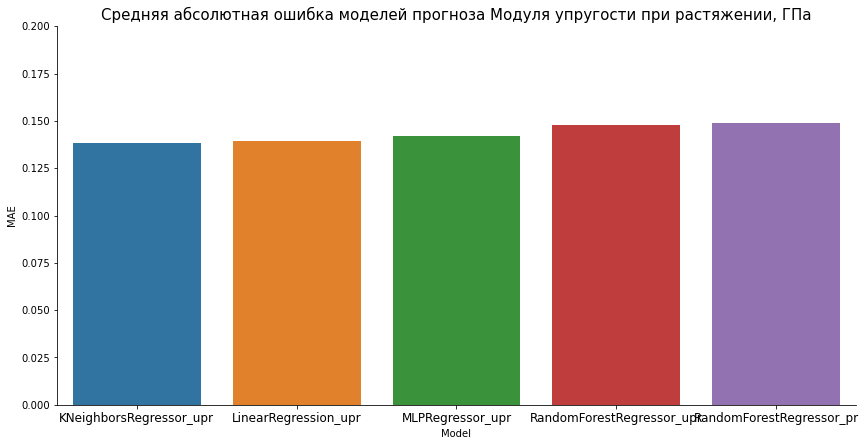

In [333]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Модуля упругости при растяжении, ГПа'
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.2)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Модуля упругости при растяжении, ГПа', size=15)

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа')

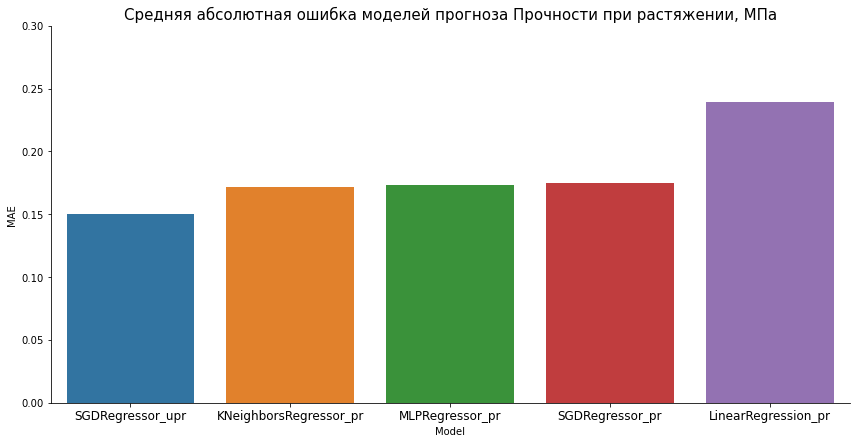

In [335]:
# Создание графика для средней абсолютной ошибки моделей прогноза параметра 'Прочности при растяжении, МПа'
sns.catplot(data=models_sort[5:10], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0, ymax=0.3)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей прогноза Прочности при растяжении, МПа', size=15)

Вывод: средние ошибки моделей прогноза примерно одинаковые

###### Построение нейронной сети на Keras

In [296]:
# Загрузка библиотеки tensorflow
import tensorflow as tf
# Загрузка модуля keras библиотеки tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Вывод версии библиотеки tensorflow
print(tf.__version__)

2.11.0


- Нейронная сеть для прогноза параметра Модуль упругости при растяжении

In [297]:
# Создание слоя, который выполняет нормализацию входных объектов
normalizer = tf.keras.layers.Normalization(axis=-1)

In [298]:
# Получение данных в слой
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [299]:
# Вид модели - коллекция, стек слоев
model_upr = Sequential(X_train_upr_norm)
# Добавление слоев в модель
model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [300]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [301]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
1/1 [==============================] - 3s 3s/step - loss: 0.7882 - val_loss: 0.5656
Epoch 2/40
1/1 [==============================] - 0s 35ms/step - loss: 0.7278 - val_loss: 0.5573
Epoch 3/40
1/1 [==============================] - 0s 48ms/step - loss: 0.6109 - val_loss: 0.5436
Epoch 4/40
1/1 [==============================] - 0s 49ms/step - loss: 0.5244 - val_loss: 0.5192
Epoch 5/40
1/1 [==============================] - 0s 46ms/step - loss: 0.5035 - val_loss: 0.4902
Epoch 6/40
1/1 [==============================] - 0s 39ms/step - loss: 0.4682 - val_loss: 0.4584
Epoch 7/40
1/1 [==============================] - 0s 37ms/step - loss: 0.4296 - val_loss: 0.4244
Epoch 8/40
1/1 [==============================] - 0s 37ms/step - loss: 0.3703 - val_loss: 0.3861
Epoch 9/40
1/1 [==============================] - 0s 38ms/step - loss: 0.3099 - val_loss: 0.3455
Epoch 10/40
1/1 [==============================] - 0s 39ms/step - loss: 0.2741 - val_loss: 0.3083
Epoch 11/40
1/1 [==============

In [302]:
# Вывод архитектуры сети для upr
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [303]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

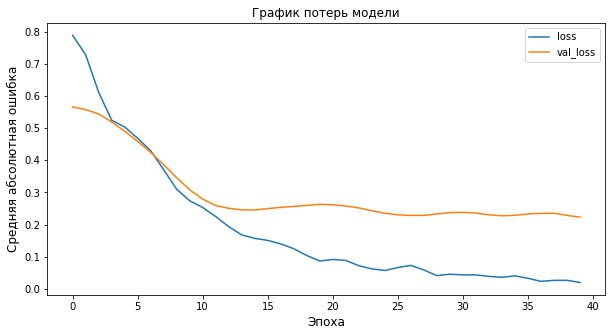

In [304]:
# Построение графика потерь модели
model_loss_plot(history_upr)

1/1 [==============================] - 0s 199ms/step


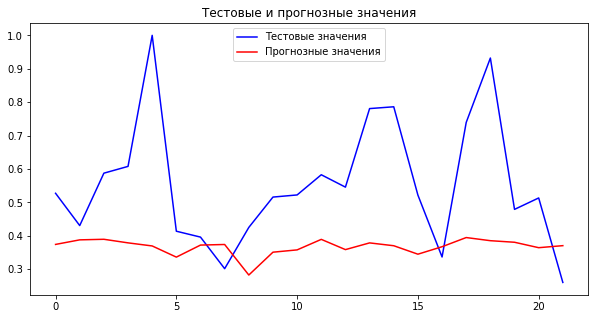

In [305]:
# Построение графика оригинального и прогнозного значения y
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

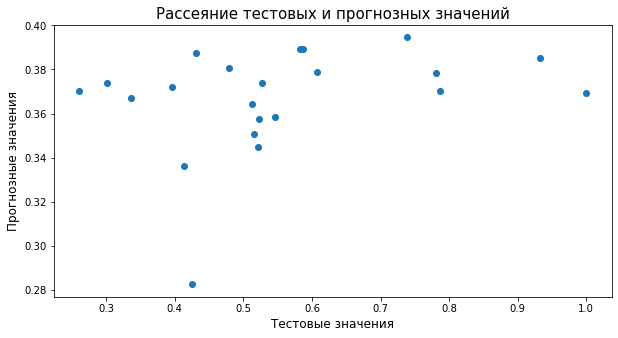

In [306]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_upr, predicted_upr)

In [307]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)}')

1/1 [==============================] - 0s 32ms/step - loss: 0.2070
Model MAE: 0.2070351094007492


In [308]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))}')

MAE среднего значения: Модуль упругости при растяжении, ГПа    0.143482
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для прогноза параметра Прочность при растяжении

In [309]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [310]:
# Вид модели - коллекция, стек слоев
model_pr = Sequential(X_train_pr_norm)
# Добавление слоев в модель
model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [311]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [312]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [313]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
2/2 [==============================] - 2s 307ms/step - loss: 0.7358 - val_loss: 0.4538
Epoch 2/300
2/2 [==============================] - 0s 29ms/step - loss: 0.6619 - val_loss: 0.4373
Epoch 3/300
2/2 [==============================] - 0s 31ms/step - loss: 0.4894 - val_loss: 0.4850
Epoch 4/300
2/2 [==============================] - 0s 34ms/step - loss: 0.4196 - val_loss: 0.5108
Epoch 5/300
2/2 [==============================] - 0s 33ms/step - loss: 0.3337 - val_loss: 0.4877
Epoch 6/300
2/2 [==============================] - 0s 32ms/step - loss: 0.3535 - val_loss: 0.5292
Epoch 7/300
2/2 [==============================] - 0s 31ms/step - loss: 0.3730 - val_loss: 0.5772
Epoch 8/300
2/2 [==============================] - 0s 33ms/step - loss: 0.2942 - val_loss: 0.5584
Epoch 9/300
2/2 [==============================] - 0s 40ms/step - loss: 0.4028 - val_loss: 0.5558
Epoch 10/300
2/2 [==============================] - 0s 29ms/step - loss: 0.2731 - val_loss: 0.5661
Epoch 11/300
2/2 [

In [314]:
# Вывод архитектуры сети для pr
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1536      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

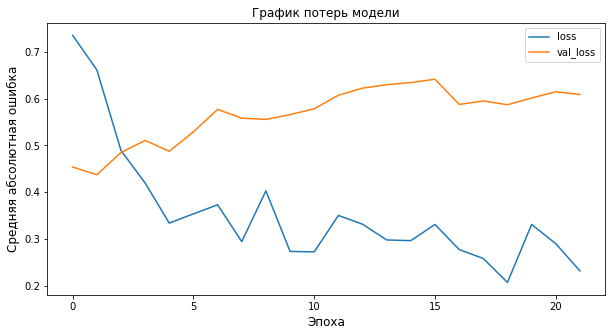

In [315]:
# Построение графика потерь модели
model_loss_plot(history_pr)

1/1 [==============================] - 0s 173ms/step


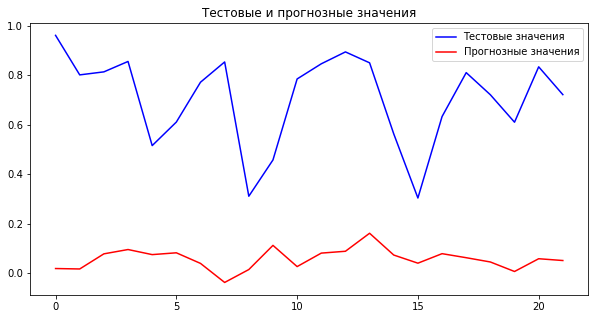

In [316]:
# Построение графика оригинального и прогнозного значения y
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

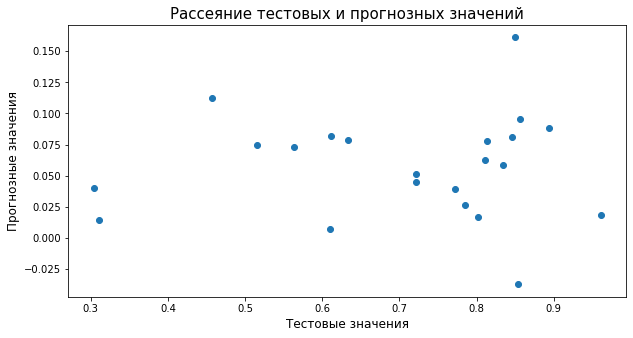

In [317]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_pr, predicted_pr)

In [318]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_pr.evaluate(X_test_pr, y_test_pr)}')

1/1 [==============================] - 0s 37ms/step - loss: 0.6480
Model MAE: 0.6480029821395874


In [319]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))}')

MAE среднего значения: Прочность при растяжении, МПа    0.149162
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


- Нейронная сеть для предсказания параметра Соотношение матрица-наполнитель

In [320]:
# Назначение переменных для создания модели
x_mn = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df[['Соотношение матрица-наполнитель']]
# Разбиение данных на обучающую и тестовую выборки
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [321]:
# Получение данных в слой, который выполняет нормализацию входных объектов
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [322]:
# Вид модели - коллекция, стек слоев
model_mn = Sequential(X_train_mn_norm)
# Добавление слоев в модель
model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [323]:
# Остановка обучения, когда контролируемая метрика перестает улучшаться
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [324]:
# Определение процедуры обучения: передача SGD (Стохастический оптимизатор градиентного спуска,
# включает в себя поддержку импульса, затухания скорости обучения и импульсак Нестеровка),
# минимизация по 'mean_absolute_error'
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [325]:
%%time
# Создание экземпляра и запуск обучения через метод fit()
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.0972 - val_loss: 0.2491
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 0.9027 - val_loss: 0.4702
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 0.6607 - val_loss: 0.3877
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 0.4973 - val_loss: 0.3291
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 0.4090 - val_loss: 0.2587
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3384 - val_loss: 0.1982
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 0.2439 - val_loss: 0.1709
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 0.2270 - val_loss: 0.1944
Epoch 9/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2057 - val_loss: 0.1585
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 0.1397 - val_loss: 0.1458
Epoch 11/100
1/1 [===

In [326]:
# Вывод архитектуры сети для mn
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1536      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

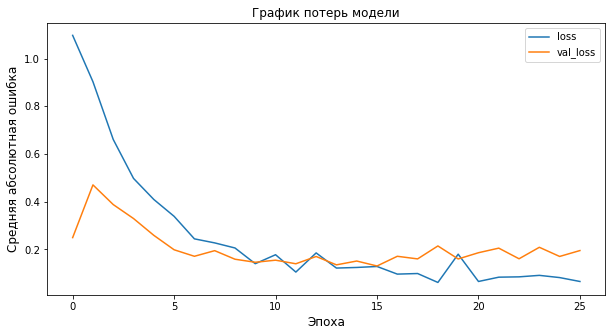

In [327]:
# Построение графика потерь модели
model_loss_plot(history_mn)

1/1 [==============================] - 0s 183ms/step


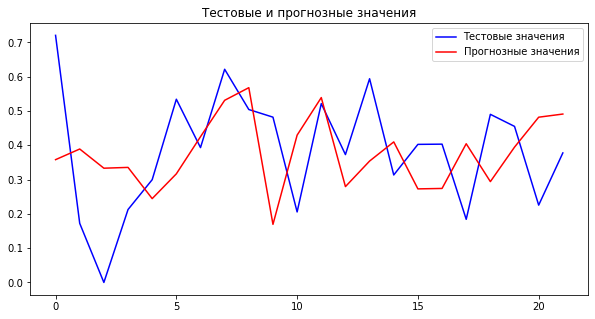

In [328]:
# Построение графика оригинального и прогнозного значения y
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

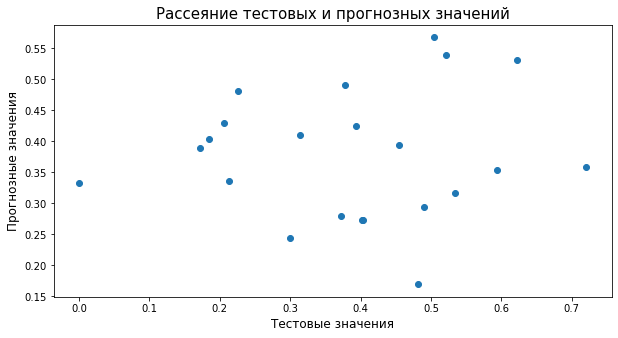

In [329]:
# Построение точечного графика рассеяния тестового и прогнозного значения y
actual_and_predicted_scatter(original_mn, predicted_mn)

In [330]:
# Вывод результата ошибки модели прогноза y
print(f'Model MAE: {model_mn.evaluate(X_test_mn, y_test_mn)}')

1/1 [==============================] - 0s 30ms/step - loss: 0.1629
Model MAE: 0.1628706306219101


In [331]:
# Вывод результата средней абсолютной ошибки модели прогноза y
print(f'MAE среднего значения: {np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))}')

MAE среднего значения: Соотношение матрица-наполнитель    0.135772
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Вывод: средняя абсолютная ошибка модели прогноза по рассматриваемым моделям сетей примерно в тех же границах, что и при использовании других методов